## Project Objective

The goal of this project is to analyze the relationship between aviation activity
(passengers, freight, number of carriers) and aviation-related CO₂ emissions,
and to derive interpretable indicators that can support policy or business decisions.


In [186]:
# 1. Importation des bibliothèques et chargement des données
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt 
import seaborn as sns

In [187]:
# Chargement des datasets
data1 = pd.read_csv('/kaggle/input/aerien1/annual-co-emissions-from-aviation.csv')
print(data1.shape)
print(data1.head(5))
print(data1.info())

(1605, 4)
        Entity Code  Year  Total annual CO₂ emissions from aviation
0  Afghanistan  AFG  2013                                 208656.12
1  Afghanistan  AFG  2014                                 227078.30
2  Afghanistan  AFG  2015                                 187643.45
3  Afghanistan  AFG  2016                                 177195.73
4  Afghanistan  AFG  2017                                 204241.47
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    1605 non-null   object 
 1   Code                                      1527 non-null   object 
 2   Year                                      1605 non-null   int64  
 3   Total annual CO₂ emissions from aviation  1605 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usa

In [188]:
data_passagers = pd.read_csv(
    '/kaggle/input/donnee-ligne/API_IS.AIR.PSGR_DS2_fr_csv_v2_22687.csv',
    sep=",",
    quotechar='"',
    encoding='utf-8-sig',
    skiprows=4  # car souvent les 4 premières lignes sont des descriptions inutiles
)
print(data_passagers.shape)
print(data_passagers.head(5))

(266, 70)
  Country Name Country Code                           Indicator Name  \
0        Aruba          ABW  Transport aérien, voyageurs transportés   
1          NaN          AFE  Transport aérien, voyageurs transportés   
2  Afghanistan          AFG  Transport aérien, voyageurs transportés   
3          NaN          AFW  Transport aérien, voyageurs transportés   
4       Angola          AGO  Transport aérien, voyageurs transportés   

  Indicator Code  1960  1961  1962  1963  1964  1965  ...        2016  \
0    IS.AIR.PSGR   NaN   NaN   NaN   NaN   NaN   NaN  ...         NaN   
1    IS.AIR.PSGR   NaN   NaN   NaN   NaN   NaN   NaN  ...  41553429.0   
2    IS.AIR.PSGR   NaN   NaN   NaN   NaN   NaN   NaN  ...   1917924.0   
3    IS.AIR.PSGR   NaN   NaN   NaN   NaN   NaN   NaN  ...   8129874.0   
4    IS.AIR.PSGR   NaN   NaN   NaN   NaN   NaN   NaN  ...   1482546.0   

          2017          2018          2019          2020          2021  2022  \
0    223502.00  2.742800e+05          

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [189]:
data_fret = pd.read_csv(
    '/kaggle/input/fretmilliontonneskm/API_IS.AIR.GOOD.MT.K1_DS2_en_csv_v2_19498.csv',
    sep=",",
    quotechar='"',
    encoding='utf-8-sig',
    skiprows=4  # car souvent les 4 premières lignes sont des descriptions inutiles
)
print(data_fret.shape)
data_fret.head(5)

(266, 70)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                            Indicator Name     Indicator Code  1960  1961  \
0  Air transport, freight (million ton-km)  IS.AIR.GOOD.MT.K1   NaN   NaN   
1  Air transport, freight (million ton-km)  IS.AIR.GOOD.MT.K1   NaN   NaN   
2  Air transport, freight (million ton-km)  IS.AIR.GOOD.MT.K1   NaN   NaN   
3  Air transport, freight (million ton-km)  IS.AIR.GOOD.MT.K1   NaN   NaN   
4  Air transport, freight (million ton-km)  IS.AIR.GOOD.MT.K1   NaN   NaN   

   1962  1963  1964  1965  ...         2016         2017         2018  \
0   NaN   NaN   NaN   NaN  ...          NaN          NaN          NaN   
1   NaN   NaN   NaN   NaN  ...  2870.646839  3607.123878  3526.787055   
2   NaN   NaN   NaN   NaN  ...    29.010881    21.462557    29.559349   
3   NaN   NaN   NaN   NaN  ...    39.603981    41.329198    39.663229   
4   NaN   NaN   NaN   NaN  ...    43.940435    67.320350    78.159640   

          2019         2020         2021  2022  2023  2024  Unnamed: 69  
0          NaN          NaN          NaN   NaN   NaN   NaN          NaN  
1  3732.431229  3296.166818  4266.475686   NaN   NaN   NaN          NaN  
2    20.014206    19.878902    12.020125   NaN   NaN   NaN          NaN  
3    32.295049          NaN    28.163339   NaN   NaN   NaN          NaN  
4    68.043580    28.899770    31.036380   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [190]:
data_transp = pd.read_csv(
    '/kaggle/input/transporteur/API_IS.AIR.DPRT_DS2_en_csv_v2_22688.csv',
    sep=",",
    quotechar='"',
    encoding='utf-8-sig',
    skiprows=4  # car souvent les 4 premières lignes sont des descriptions inutiles
)
print(data_transp.shape)
data_transp.head(10)

(266, 70)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   
5                      Albania          ALB   
6                      Andorra          AND   
7                   Arab World          ARB   
8         United Arab Emirates          ARE   
9                    Argentina          ARG   

                                      Indicator Name Indicator Code  1960  \
0  Air transport, registered carrier departures w...    IS.AIR.DPRT   NaN   
1  Air transport, registered carrier departures w...    IS.AIR.DPRT   NaN   
2  Air transport, registered carrier departures w...    IS.AIR.DPRT   NaN   
3  Air transport, registered carrier departures w...    IS.AIR.DPRT   NaN   
4  Air transport, registered carrier departures w...    IS.AIR.DPRT   NaN   
5  Air transport, registered carrier departures w...    IS.AIR.DPRT   NaN   
6  Air transport, registered carrier departures w...    IS.AIR.DPRT   NaN   
7  Air transport, registered carrier departures w...    IS.AIR.DPRT   NaN   
8  Air transport, registered carrier departures w...    IS.AIR.DPRT   NaN   
9  Air transport, registered carrier departures w...    IS.AIR.DPRT   NaN   

   1961  1962  1963  1964  1965  ...       2016        2017          2018  \
0   NaN   NaN   NaN   NaN   NaN  ...        NaN     2132.00  2.276000e+03   
1   NaN   NaN   NaN   NaN   NaN  ...   562927.0   630147.00  7.051275e+05   
2   NaN   NaN   NaN   NaN   NaN  ...    22770.0    24207.00  1.045400e+04   
3   NaN   NaN   NaN   NaN   NaN  ...   157788.0   151203.00  1.571267e+05   
4   NaN   NaN   NaN   NaN   NaN  ...    15482.0    13494.00  1.397800e+04   
5   NaN   NaN   NaN   NaN   NaN  ...      306.0     1904.00  2.935000e+03   
6   NaN   NaN   NaN   NaN   NaN  ...        NaN         NaN           NaN   
7   NaN   NaN   NaN   NaN   NaN  ...  1476812.0  1503553.38  1.539593e+06   
8   NaN   NaN   NaN   NaN   NaN  ...   463947.0   459137.00  4.559560e+05   
9   NaN   NaN   NaN   NaN   NaN  ...   149334.0   146631.00  1.618620e+05   

          2019         2020        2021  2022  2023  2024  Unnamed: 69  
0          NaN          NaN         NaN   NaN   NaN   NaN          NaN  
1   717795.300  286064.1974  399895.848   NaN   NaN   NaN          NaN  
2     7334.000    4635.7140    2865.737   NaN   NaN   NaN          NaN  
3   158874.790   92611.3490  134532.013   NaN   NaN   NaN          NaN  
4    13647.000    3792.0000    3805.000   NaN   NaN   NaN          NaN  
5     2558.000    1274.0000    1471.000   NaN   NaN   NaN          NaN  
6          NaN          NaN         NaN   NaN   NaN   NaN          NaN  
7  1599362.272  664879.5750  920600.238   NaN   NaN   NaN          NaN  
8   426157.272  185260.0000  234612.000   NaN   NaN   NaN          NaN  
9   163106.000   27447.0000   54218.000   NaN   NaN   NaN          NaN  

[10 rows x 70 columns]

In [191]:
data_pib = pd.read_csv('/kaggle/input/pibpays/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_19294.csv',sep=",",
    quotechar='"',
    encoding='utf-8-sig',
    skiprows=4  )
data_pib = data_pib.loc[:,['Country Name','2013', '2014', '2015',	'2016',	'2017',	'2018',	'2019',	'2020']]
data_pib = data_pib.dropna()
data_pib = data_pib.melt(id_vars='Country Name', var_name='Year', value_name='PIB')
data_pib['Year'] = data_pib['Year'].astype(int)
data_pib

Country Name  Year           PIB
0                           Aruba  2013  2.727850e+09
1     Africa Eastern and Southern  2013  9.623949e+11
2                     Afghanistan  2013  2.014642e+10
3      Africa Western and Central  2013  8.369374e+11
4                          Angola  2013  1.323391e+11
...                           ...   ...           ...
2051                        Samoa  2020  8.688984e+08
2052                       Kosovo  2020  7.717145e+09
2053                 South Africa  2020  3.379747e+11
2054                       Zambia  2020  1.813776e+10
2055                     Zimbabwe  2020  2.686794e+10

[2056 rows x 3 columns]

In [192]:
data_carburant = pd.read_csv('/kaggle/input/carburant-new-sim/aviation_fuel_consumption_all_countries.csv', encoding='utf-8-sig')
data_carburant = data_carburant.rename(columns = {'Pays' : 'Country Name'})
print(data_carburant.shape)
data_carburant.head(10)

(1432, 3)


Country Name  Year  Carburant utilise
0  Afghanistan  2013           66527.04
1  Afghanistan  2014           57348.79
2  Afghanistan  2015           61200.21
3  Afghanistan  2016           59217.57
4  Afghanistan  2017           58524.08
5  Afghanistan  2018           59721.00
6  Afghanistan  2019           61751.11
7  Afghanistan  2020           62403.68
8      Albania  2013           80423.79
9      Albania  2014           84773.03

In [193]:
# 3. Nettoyage et préparation des données
"""
- Nettoyer les colonnes inutiles
- Renommer les colonnes
- Merger les datasets
"""
#,'2013','2014','2015','2016','2017','2018','2019'
data_passagers = data_passagers.loc[:,['Country Name','2013','2014','2015','2016','2017','2018','2019','2020']]
data_fret = data_fret.loc[:,['Country Name','2013','2014','2015','2016','2017','2018','2019','2020']]
data_transp = data_transp.loc[:,['Country Name','2013','2014','2015','2016','2017','2018','2019','2020']]
data1 = data1[(data1['Year'] <= 2020) & (2013 <= data1['Year']) ]
data1 = data1.loc[:,['Entity',	'Year',	'Total annual CO₂ emissions from aviation']]

In [194]:
#gerer les donnes manquates
# data_passagers = data_passagers.dropna()
# data_fret = data_fret.dropna()
# data_transp = data_transp.dropna()
# data_carburant = data_carburant.dropna()
# data_distance = data_distance.dropna()fret
print(data_passagers.shape)
print(data_fret.shape)
print(data_transp.shape)
# print(data_distance.shape)

(266, 9)
(266, 9)
(266, 9)


In [195]:
data1 = data1.rename(columns = {'Entity' : 'Country Name'})
print(data1.head(3))
print(data_carburant.head(3))

  Country Name  Year  Total annual CO₂ emissions from aviation
0  Afghanistan  2013                                 208656.12
1  Afghanistan  2014                                 227078.30
2  Afghanistan  2015                                 187643.45
  Country Name  Year  Carburant utilise
0  Afghanistan  2013           66527.04
1  Afghanistan  2014           57348.79
2  Afghanistan  2015           61200.21


In [196]:
data_passagers = data_passagers.melt(id_vars='Country Name', var_name='Year', value_name='Nombre de passagers')
data_fret = data_fret.melt(id_vars='Country Name', var_name='Year', value_name='fret(TonnesMbyKm)')
data_transp = data_transp.melt(id_vars='Country Name', var_name='Year', value_name='Departs de Transporteur')

In [197]:
data1['Year'] = data1['Year'].astype(int)
data_passagers['Year'] = data_passagers['Year'].astype(int)
data_fret['Year'] = data_fret['Year'].astype(int)
data_transp['Year'] = data_transp['Year'].astype(int)
data_carburant = data_carburant.dropna(subset=['Year'])
data_carburant['Year'] = data_carburant['Year'].astype(int)
data_pib['Year'] = data_pib['Year'].astype(int)

# # Maintenant, on peux faire la fusion
# df = pd.merge(data1, data_passagers, on=['Country Name', 'Year'])
# df = pd.merge(df, data_fret,on=['Country Name', 'Year'])
# df = pd.merge(df,data_transp,on=['Country Name', 'Year'])
# df['Year'] = df['Year'].astype(int)
# # data_carburant['Year'] = data_carburant['Year'].astype(int)
# # df = pd.merge(df,data_carburant,on=['Country Name', 'Year'])
# df = pd.merge(data_fret, data_passagers, on=['Country Name'])
# df['Country Name'].unique()

In [198]:
import pandas as pd
import unicodedata

# --- FONCTIONS ---

def remove_accents(input_str):
    if isinstance(input_str, str):
        nfkd_form = unicodedata.normalize('NFKD', input_str)
        return "".join([c for c in nfkd_form if not unicodedata.combining(c)])
    return input_str

def normalize_country(name):
    if pd.isnull(name):
        return name
    name = remove_accents(name)
    name = name.lower().strip()
    name = name.replace("-", " ")
    return name

# Dictionnaire de correspondance manuel (à compléter au besoin)
# manual_mapping = {
#     'afrique du sud': 'south africa',
#     'albanie': 'albania',
#     'algerie': 'algeria',
#     'allemagne': 'germany',
#     'arabie saoudite': 'saudi arabia',
#     'argentine': 'argentina',
#     'armenie': 'armenia',
#     'australie': 'australia',
#     'autriche': 'austria',
#     'azerbaidjan': 'azerbaijan',
#     'bahamas': 'bahamas, the',
#     'bahrein': 'bahrain',
#     'belgique': 'belgium',
#     'bhoutan': 'bhutan',
#     'bolivie': 'bolivia',
#     'bosnieherzegovine': 'bosnia and herzegovina',
#     'bresil': 'brazil',
#     'bulgarie': 'bulgaria',
#     'cambodge': 'cambodia',
#     'cameroun': 'cameroon',
#     'chili': 'chile',
#     'chine': 'china',
#     'chypre': 'cyprus',
#     'colombie': 'colombia',
#     'coree republique de': 'korea, rep.',
#     'coree republique democratique de': 'korea, dem. rep.',
#     'croatie': 'croatia',
#     'egypte republique arabe d': 'egypt, arab rep.',
#     'equateur': 'ecuador',
#     'erythree': 'eritrea',
#     'espagne': 'spain',
#     'ethiopie': 'ethiopia',
#     'fidji': 'fiji',
#     'finlande': 'finland',
#     'georgie': 'georgia',
#     'grece': 'greece',
#     'hongrie': 'hungary',
#     'inde': 'india',
#     'indonesie': 'indonesia',
#     'iran republique islamique d': 'iran, islamic rep.',
#     'irlande': 'ireland',
#     'islande': 'iceland',
#     'italie': 'italy',
#     'japon': 'japan',
#     'jordanie': 'jordan',
#     'koweit': 'kuwait',
#     'lettonie': 'latvia',
#     'liban': 'lebanon',
#     'libye': 'libya',
#     'lituanie': 'lithuania',
#     'malaisie': 'malaysia',
#     'malte': 'malta',
#     'maroc': 'morocco',
#     'maurice': 'mauritius',
#     'mauritanie': 'mauritania',
#     'mexique': 'mexico',
#     'mongolie': 'mongolia',
#     'namibie': 'namibia',
#     'nouvellezelande': 'new zealand',
#     'ouganda': 'uganda',
#     'ouzbekistan': 'uzbekistan',
#     'perou': 'peru',
#     'pologne': 'poland',
#     'republique dominicaine': 'dominican republic',
#     'republique kirghize': 'kyrgyz republic',
#     'republique slovaque': 'slovak republic',
#     'republique tcheque': 'czech republic',
#     'roumanie': 'romania',
#     'royaumeuni': 'united kingdom',
#     'serbie': 'serbia',
#     'singapour': 'singapore',
#     'slovenie': 'slovenia',
#     'soudan': 'sudan',
#     'suede': 'sweden',
#     'suisse': 'switzerland',
#     'tadjikistan': 'tajikistan',
#     'tanzanie': 'tanzania',
#     'thailande': 'thailand',
#     'tunisie': 'tunisia',
#     'turquie': 'turkey',
#     'venezuela, rb': 'venezuela, rb',
#     'vietnam': 'vietnam',
#     'yemen rep du': 'yemen, rep.',
#     'zambie': 'zambia',
# }

manual_mapping = {
    'afrique du sud': 'south africa',
    'albanie': 'albania',
    'algerie': 'algeria',
    'allemagne': 'germany',
    'arabie saoudite': 'saudi arabia',
    'argentine': 'argentina',
    'armenie': 'armenia',
    'australie': 'australia',
    'autriche': 'austria',
    'azerbaidjan': 'azerbaijan',
    'bahamas': 'bahamas, the',
    'bahrein': 'bahrain',
    'belgique': 'belgium',
    'bhoutan': 'bhutan',
    'bolivie': 'bolivia',
    'bosnieherzegovine': 'bosnia and herzegovina',
    'bresil': 'brazil',
    'bulgarie': 'bulgaria',
    'cambodge': 'cambodia',
    'cameroun': 'cameroon',
    'chili': 'chile',
    'chine': 'china',
    'chypre': 'cyprus',
    'colombie': 'colombia',
    'coree republique de': 'korea, rep.',
    'coree republique democratique de': 'korea, dem. rep.',
    'croatie': 'croatia',
    'egypte republique arabe d': 'egypt, arab rep.',
    'equateur': 'ecuador',
    'erythree': 'eritrea',
    'espagne': 'spain',
    'ethiopie': 'ethiopia',
    'fidji': 'fiji',
    'finlande': 'finland',
    'georgie': 'georgia',
    'grece': 'greece',
    'hongrie': 'hungary',
    'inde': 'india',
    'indonesie': 'indonesia',
    'iran republique islamique d': 'iran, islamic rep.',
    'irlande': 'ireland',
    'islande': 'iceland',
    'italie': 'italy',
    'japon': 'japan',
    'jordanie': 'jordan',
    'koweit': 'kuwait',
    'lettonie': 'latvia',
    'liban': 'lebanon',
    'libye': 'libya',
    'lituanie': 'lithuania',
    'malaisie': 'malaysia',
    'malte': 'malta',
    'maroc': 'morocco',
    'maurice': 'mauritius',
    'mauritanie': 'mauritania',
    'mexique': 'mexico',
    'mongolie': 'mongolia',
    'namibie': 'namibia',
    'nouvellezelande': 'new zealand',
    'ouganda': 'uganda',
    'ouzbekistan': 'uzbekistan',
    'perou': 'peru',
    'pologne': 'poland',
    'republique dominicaine': 'dominican republic',
    'republique kirghize': 'kyrgyz republic',
    'republique slovaque': 'slovak republic',
    'republique tcheque': 'czech republic',
    'roumanie': 'romania',
    'royaumeuni': 'united kingdom',
    'serbie': 'serbia',
    'singapour': 'singapore',
    'slovenie': 'slovenia',
    'soudan': 'sudan',
    'suede': 'sweden',
    'suisse': 'switzerland',
    'tadjikistan': 'tajikistan',
    'tanzanie': 'tanzania',
    'thailande': 'thailand',
    'tunisie': 'tunisia',
    'turquie': 'turkey',
    'venezuela, rb': 'venezuela, rb',
    'vietnam': 'vietnam',
    'yemen rep du': 'yemen, rep.',
    'zambie': 'zambia',
    
    # Ajouts pour être complet :
    'afghanistan': 'afghanistan',
    'andorre': 'andorra',
    'angola': 'angola',
    'antiguaetbarbuda': 'antigua and barbuda',
    'aruba': 'aruba',
    'bangladesh': 'bangladesh',
    'belize': 'belize',
    'benin': 'benin',
    'birmanie': 'myanmar',
    'botswana': 'botswana',
    'brunei': 'brunei darussalam',
    'burkinafaso': 'burkina faso',
    'burundi': 'burundi',
    'capvert': 'cape verde',
    'comores': 'comoros',
    'costarica': 'costa rica',
    'cotedivoire': "cote d'ivoire",
    'danemark': 'denmark',
    'djibouti': 'djibouti',
    'dominique': 'dominica',
    'emiratsarabesunis': 'united arab emirates',
    'eswatini': 'eswatini',
    'fidji': 'fiji',
    'gabon': 'gabon',
    'gambie': 'gambia',
    'grenade': 'grenada',
    'guatemala': 'guatemala',
    'guinee': 'guinea',
    'guineebissau': 'guinea-bissau',
    'guineeequatoriale': 'equatorial guinea',
    'guyana': 'guyana',
    'haiti': 'haiti',
    'honduras': 'honduras',
    'hongkong': 'hong kong sar, china',
    'ilesmarshall': 'marshall islands',
    'iraq': 'iraq',
    'israel': 'israel',
    'jamaique': 'jamaica',
    'kazakhstan': 'kazakhstan',
    'kenya': 'kenya',
    'kirghizistan': 'kyrgyz republic',
    'kiribati': 'kiribati',
    'laos': 'lao pdr',
    'lesotho': 'lesotho',
    'liberia': 'liberia',
    'luxembourg': 'luxembourg',
    'macedoine': 'north macedonia',
    'madagascar': 'madagascar',
    'malawi': 'malawi',
    'maldives': 'maldives',
    'mali': 'mali',
    'moldavie': 'moldova',
    'montenegro': 'montenegro',
    'mozambique': 'mozambique',
    'nepal': 'nepal',
    'nicaragua': 'nicaragua',
    'niger': 'niger',
    'nigeria': 'nigeria',
    'norvege': 'norway',
    'pakistan': 'pakistan',
    'panama': 'panama',
    'papouasienouvelleguinee': 'papua new guinea',
    'paraguay': 'paraguay',
    'paysbas': 'netherlands',
    'portugal': 'portugal',
    'qatar': 'qatar',
    'republiquecentrafricaine': 'central african republic',
    'republiquedemocratiqueducongo': 'congo, dem. rep.',
    'russie': 'russian federation',
    'russia': 'russian federation',
    'Russia': 'russian federation',
    'federation de russie': 'russian federation',
    'rwanda': 'rwanda',
    'saintelucie': 'saint lucia',
    'salomon': 'solomon islands',
    'samoa': 'samoa',
    'senegal': 'senegal',
    'seychelles': 'seychelles',
    'sri lanka': 'sri lanka',
    'suriname': 'suriname',
    'syrie': 'syrian arab republic',
    'timororiental': 'timor-leste',
    'togo': 'togo',
    'trinidadettobago': 'trinidad and tobago',
    'uruguay': 'uruguay',
    'vanuatu': 'vanuatu',
    'zimbabwe': 'zimbabwe',
    'etatsunis': 'united states',
    'États-Unis': 'united states',
    'etats unis': 'united states',

}



def apply_manual_mapping(name):
    normalized = normalize_country(name)
    return manual_mapping.get(normalized, normalized)

# --- TRAITEMENT ---

# Normalisation
data_passagers['Country Name Normalized'] = data_passagers['Country Name'].apply(apply_manual_mapping)
data_transp['Country Name Normalized'] = data_transp['Country Name'].apply(normalize_country)
data_fret['Country Name Normalized'] = data_fret['Country Name'].apply(normalize_country)
# data1['Country Name Normalized'] = data1['Country Name'].apply(normalize_country)

# Jointure
merged = data_passagers.merge(data_transp, on=['Country Name Normalized', 'Year'], how='outer')
merged = merged.merge(data_fret, on=['Country Name Normalized', 'Year'], how='outer')
# merged = merged.merge(data1, on=['Country Name Normalized', 'Year'], how='outer')

# # Optionnel : remettre un "nom de pays" propre
# merged['Country Name'] = merged['Country Name_x'].combine_first(merged['Country Name_y']).combine_first(merged['Country Name'])

# Nettoyage des colonnes
merged = merged.drop(columns=['Country Name_x', 'Country Name_y'])

print("✅ Fusion terminée. Fichier enregistré sous : data_merge.csv")


✅ Fusion terminée. Fichier enregistré sous : data_merge.csv


In [199]:
# Normalisation pour data1
data1['Country Name Normalized'] = data1['Country Name'].apply(normalize_country)

# Fusion avec data1
merged = merged.merge(data1, on=['Country Name Normalized', 'Year'], how='outer')

print("✅ Fusion terminée. Fichier enregistré sous : data_merge.csv")
merged = merged.loc[:, ['Year',	'Nombre de passagers',	'Country Name Normalized',	'Departs de Transporteur', 'fret(TonnesMbyKm)',	'Total annual CO₂ emissions from aviation']]


✅ Fusion terminée. Fichier enregistré sous : data_merge.csv


In [200]:
# Normalisation pour data_carburant
data_carburant['Country Name Normalized'] = data_carburant['Country Name'].apply(normalize_country)

# Fusion avec data_carburant
merged = merged.merge(data_carburant, on=['Country Name Normalized', 'Year'], how='outer')

print("✅ Fusion terminée. Fichier enregistré sous : data_merge.csv")
merged = merged.loc[:, ['Year',	'Nombre de passagers',	'Country Name Normalized',	'Departs de Transporteur', 'fret(TonnesMbyKm)',	'Total annual CO₂ emissions from aviation', 'Carburant utilise']]

✅ Fusion terminée. Fichier enregistré sous : data_merge.csv


In [201]:
# Normalisation pour data_pib
data_pib['Country Name Normalized'] = data_pib['Country Name'].apply(normalize_country)

# Fusion avec data_pib
merged = merged.merge(data_pib, on=['Country Name Normalized', 'Year'], how='outer')

print("✅ Fusion terminée. Fichier enregistré sous : data_merge.csv")
merged = merged.loc[:, ['Year',	'Nombre de passagers',	'Country Name Normalized',	'Departs de Transporteur', 'fret(TonnesMbyKm)',	'Total annual CO₂ emissions from aviation', 'Carburant utilise', 'PIB']]

✅ Fusion terminée. Fichier enregistré sous : data_merge.csv


In [202]:
merged = merged.dropna()
print(merged['Country Name Normalized'].unique())

['afghanistan' 'algeria' 'angola' 'argentina' 'australia' 'austria'
 'azerbaijan' 'bangladesh' 'belarus' 'belgium' 'belize' 'bhutan' 'bolivia'
 'botswana' 'brazil' 'bulgaria' 'burkina faso' 'cambodia' 'cameroon'
 'canada' 'chile' 'china' 'colombia' 'costa rica' "cote d'ivoire"
 'croatia' 'cuba' 'cyprus' 'dominican republic' 'ecuador' 'el salvador'
 'ethiopia' 'fiji' 'finland' 'france' 'gabon' 'georgia' 'germany' 'ghana'
 'greece' 'guatemala' 'honduras' 'hungary' 'iceland' 'india' 'indonesia'
 'iraq' 'ireland' 'israel' 'italy' 'jamaica' 'japan' 'jordan' 'kazakhstan'
 'kenya' 'kiribati' 'latvia' 'libya' 'lithuania' 'madagascar' 'malawi'
 'malaysia' 'maldives' 'mauritania' 'mauritius' 'mexico' 'mongolia'
 'montenegro' 'morocco' 'mozambique' 'myanmar' 'namibia' 'nepal' 'niger'
 'nigeria' 'oman' 'pakistan' 'panama' 'paraguay' 'peru' 'philippines'
 'poland' 'portugal' 'romania' 'rwanda' 'samoa' 'saudi arabia' 'senegal'
 'seychelles' 'singapore' 'south africa' 'spain' 'sri lanka' 'sudan'
 'sw

In [203]:
# Liste des pays à trafic aérien négligeable à exclure
pays_a_exclure = [
    'belize', 'bhutan', 'kiribati', 'maldives', 'seychelles', 'vanuatu', 'samoa',
    'burkina faso', 'malawi', 'mozambique', 'niger', 'rwanda', 'zambia', 'zimbabwe',
    'el salvador', 'nepal', 'madagascar', 'mauritania', 'fiji'
]

# Filtrer le DataFrame merged pour garder uniquement les pays pertinents
merged = merged[~merged['Country Name Normalized'].str.lower().isin(pays_a_exclure)]

# Vérification : afficher les pays conservés
print("Pays conservés :", merged['Country Name Normalized'].unique())
print(f"Nombre total : {merged['Country Name Normalized'].nunique()} pays")


Pays conservés : ['afghanistan' 'algeria' 'angola' 'argentina' 'australia' 'austria'
 'azerbaijan' 'bangladesh' 'belarus' 'belgium' 'bolivia' 'botswana'
 'brazil' 'bulgaria' 'cambodia' 'cameroon' 'canada' 'chile' 'china'
 'colombia' 'costa rica' "cote d'ivoire" 'croatia' 'cuba' 'cyprus'
 'dominican republic' 'ecuador' 'ethiopia' 'finland' 'france' 'gabon'
 'georgia' 'germany' 'ghana' 'greece' 'guatemala' 'honduras' 'hungary'
 'iceland' 'india' 'indonesia' 'iraq' 'ireland' 'israel' 'italy' 'jamaica'
 'japan' 'jordan' 'kazakhstan' 'kenya' 'latvia' 'libya' 'lithuania'
 'malaysia' 'mauritius' 'mexico' 'mongolia' 'montenegro' 'morocco'
 'myanmar' 'namibia' 'nigeria' 'oman' 'pakistan' 'panama' 'paraguay'
 'peru' 'philippines' 'poland' 'portugal' 'romania' 'saudi arabia'
 'senegal' 'singapore' 'south africa' 'spain' 'sri lanka' 'sudan' 'sweden'
 'switzerland' 'tajikistan' 'tanzania' 'thailand' 'tunisia' 'turkmenistan'
 'uganda' 'ukraine' 'united states' 'uzbekistan']
Nombre total : 89 pays


In [212]:
df = merged
df.head(5)

Year  Nombre de passagers Country Name Normalized  Departs de Transporteur  \
0  2013            2044188.0             afghanistan                  21696.0   
1  2014            2209428.0             afghanistan                  25920.0   
2  2015            1929907.0             afghanistan                  23532.0   
3  2016            1917924.0             afghanistan                  22770.0   
4  2017            1647425.0             afghanistan                  24207.0   

   fret(TonnesMbyKm)  Total annual CO₂ emissions from aviation  \
0          84.621216                                 208656.12   
1          34.283472                                 227078.30   
2          33.102039                                 187643.45   
3          29.010881                                 177195.73   
4          21.462557                                 204241.47   

   Carburant utilise           PIB  
0           66527.04  2.014642e+10  
1           57348.79  2.049713e+10  
2           61200.21  1.913422e+10  
3           59217.57  1.811657e+10  
4           58524.08  1.875346e+10

In [213]:
# 1. Nombre d'observations (n_samples)
n_samples = df.shape[0] - 1
df_num = df.set_index(['Country Name Normalized','Year'])
df_num = df_num.loc[:,['Nombre de passagers',	'Departs de Transporteur',	'fret(TonnesMbyKm)',	'Total annual CO₂ emissions from aviation','PIB' ,'Carburant utilise']]
X = (df_num - df_num.mean())/(df_num.std() * n_samples**(1/2))
X.head(5)
# df_num

Nombre de passagers  Departs de Transporteur  \
Country Name Normalized Year                                                 
afghanistan             2013            -0.012829                -0.011569   
                        2014            -0.012767                -0.011422   
                        2015            -0.012872                -0.011505   
                        2016            -0.012877                -0.011532   
                        2017            -0.012979                -0.011482   

                              fret(TonnesMbyKm)  \
Country Name Normalized Year                      
afghanistan             2013          -0.010792   
                        2014          -0.011181   
                        2015          -0.011190   
                        2016          -0.011222   
                        2017          -0.011280   

                              Total annual CO₂ emissions from aviation  \
Country Name Normalized Year                                             
afghanistan             2013                                 -0.012870   
                        2014                                 -0.012835   
                        2015                                 -0.012910   
                        2016                                 -0.012930   
                        2017                                 -0.012879   

                                   PIB  Carburant utilise  
Country Name Normalized Year                               
afghanistan             2013 -0.012924          -0.008750  
                        2014 -0.012919          -0.016912  
                        2015 -0.012939          -0.013487  
                        2016 -0.012955          -0.015250  
                        2017 -0.012945          -0.015867

In [214]:
# Calcul de la matrice de corrélation R
R = np.dot(X.T, X)

print("Matrice de corrélation R :")
print(R)

Matrice de corrélation R :
[[1.         0.9784635  0.95148334 0.97799905 0.95278525 0.03683077]
 [0.9784635  1.         0.96436167 0.98694567 0.95274555 0.03966938]
 [0.95148334 0.96436167 1.         0.97560447 0.98330655 0.05558563]
 [0.97799905 0.98694567 0.97560447 1.         0.97002663 0.0558813 ]
 [0.95278525 0.95274555 0.98330655 0.97002663 1.         0.0547985 ]
 [0.03683077 0.03966938 0.05558563 0.0558813  0.0547985  1.        ]]


<Axes: xlabel='Total annual CO₂ emissions from aviation', ylabel='Nombre de passagers'>

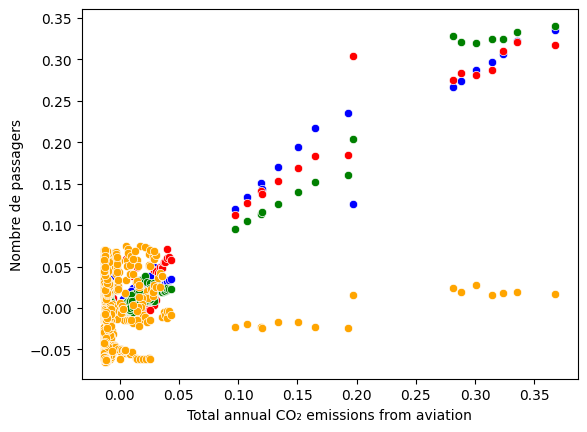

In [215]:
sns.scatterplot(data = X, x = 'Total annual CO₂ emissions from aviation', y = 'Nombre de passagers', color = 'blue')
sns.scatterplot(data = X, x = 'Total annual CO₂ emissions from aviation', y = 'fret(TonnesMbyKm)', color = 'red')
sns.scatterplot(data = X, x = 'Total annual CO₂ emissions from aviation', y = 'Departs de Transporteur', color = 'green')
sns.scatterplot(data = X, x = 'Total annual CO₂ emissions from aviation', y = 'Carburant utilise', color = 'orange')
# sns.scatterplot(data = X, x = 'Total annual CO₂ emissions from aviation', y = 'PIB', color = 'pink')

<Axes: xlabel='Total annual CO₂ emissions from aviation', ylabel='Departs de Transporteur'>

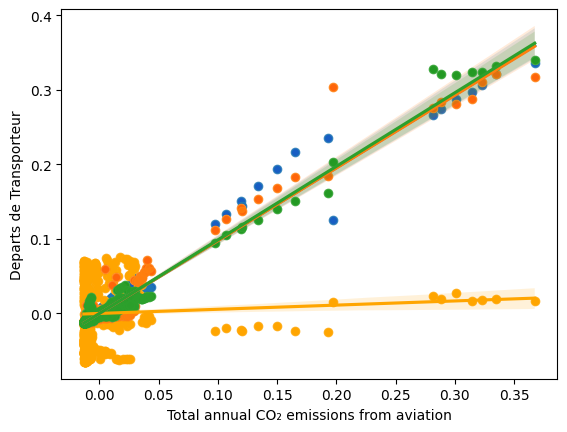

In [216]:
sns.scatterplot(data = X, x = 'Total annual CO₂ emissions from aviation', y = 'Nombre de passagers', color = 'blue')
sns.regplot(data = X, x = 'Total annual CO₂ emissions from aviation', y = 'Nombre de passagers')
sns.scatterplot(data = X, x = 'Total annual CO₂ emissions from aviation', y = 'Carburant utilise', color = 'orange')
sns.regplot(data = X, x = 'Total annual CO₂ emissions from aviation', y = 'Carburant utilise', color = 'orange')
sns.scatterplot(data = X, x = 'Total annual CO₂ emissions from aviation', y = 'fret(TonnesMbyKm)', color = 'red')
sns.regplot(data = X, x = 'Total annual CO₂ emissions from aviation', y = 'fret(TonnesMbyKm)')
sns.scatterplot(data = X, x = 'Total annual CO₂ emissions from aviation', y = 'Departs de Transporteur', color = 'green')
sns.regplot(data = X, x = 'Total annual CO₂ emissions from aviation', y = 'Departs de Transporteur')
# sns.scatterplot(data = X, x = 'Total annual CO₂ emissions from aviation', y = 'PIB', color = 'pink')
# sns.regplot(data = X, x = 'Total annual CO₂ emissions from aviation', y = 'PIB', color = 'pink')
# sns.scatterplot(data = X, x = 'Total annual CO₂ emissions from aviation', y = 'Carburant utilise', color = 'pink')
# sns.regplot(data = X, x = 'Total annual CO₂ emissions from aviation', y = 'Carburant utilise')
# sns.scatterplot(data = X, x = 'Total annual CO₂ emissions from aviation', y = 'Average Distance (km)', color = 'black')
# sns.regplot(data = X, x = 'Total annual CO₂ emissions from aviation', y = 'Average Distance (km)')

In [217]:
eigvals, eigvecs = np.linalg.eigh(R)

# 2. Trier les valeurs et vecteurs propres par ordre décroissant (important en ACP)
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# 3. U = Matrice des vecteurs propres triés
U = eigvecs

# 4. Résultat
print("Valeurs propres (par axe) :")
print(eigvals)

Valeurs propres (par axe) :
[4.88059973 0.99733597 0.07207796 0.02718492 0.01283388 0.00996753]


In [218]:
# Calcul de F
F = np.dot(X, U)
# print("\nMatrice des composantes principales F :")
# print(F)

In [219]:
# Calcul de S
S = np.dot(X.T, F).dot(np.diag(1 / np.sqrt(eigvals)))

print("Matrice de saturation S :")
print(S)

Matrice de saturation S :
[[-9.84045522e-01  2.47265811e-02  1.34679378e-01  1.05623869e-01
   4.03257848e-02 -1.10409150e-02]
 [-9.88520746e-01  2.19383794e-02  1.08886605e-01 -8.09769865e-02
  -6.22827402e-03  6.23945897e-02]
 [-9.87122245e-01  4.83058400e-03 -1.29993651e-01 -5.37713746e-02
   7.31878218e-02 -2.04980850e-02]
 [-9.94405696e-01  5.63705826e-03  3.93034768e-02 -4.03265006e-02
  -6.04711385e-02 -6.55575085e-02]
 [-9.83874462e-01  5.37260463e-03 -1.53687385e-01  7.03784811e-02
  -4.64253644e-02  3.51272144e-02]
 [-6.17972794e-02 -9.98077802e-01  4.49550665e-03  7.27657792e-04
   6.24917225e-04  8.17559032e-04]]


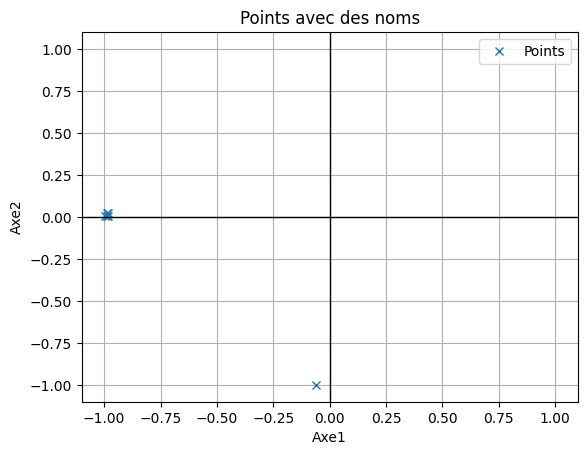

In [226]:
x = S[:,0]
y = S[:,1]

# Créer le graphique
plt.plot(x, y, 'x', label="Points")

# Ajouter des titres et des labels
plt.title("Points avec des noms")
plt.xlabel("Axe1")
plt.ylabel("Axe2")

# Ajouter une grille et afficher le repère
plt.grid(True)
plt.axhline(0, color='black', linewidth=1)  # Axe des X
plt.axvline(0, color='black', linewidth=1)  # Axe des Y

# Définir les limites du repère
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Afficher le graphique
plt.legend()
plt.show()

In [227]:
from scipy.stats import pearsonr
A = X.dot(S[:,:2])

# Supposons que X et Y sont deux listes ou des arrays numpy
X1 = A.loc[:,0]
Y1 = A.loc[:,1]
Z1 = X.loc[:,'Total annual CO₂ emissions from aviation']

# Calcul du coefficient de corrélation de Pearson
r, p_value = pearsonr(X1, Y1)

print("Coefficient de corrélation entre axe1 et axe2:", r)
print("Valeur p :", p_value) 

r, p_value = pearsonr(X1, Z1)

print("Coefficient de corrélation entre axe1 et Total annual CO₂ emissions from aviation:", r)
print("Valeur p :", p_value)

r, p_value = pearsonr(Y1, Z1)

print("Coefficient de corrélation entre axe2 et Total annual CO₂ emissions from aviation:", r)
print("Valeur p :", p_value)

Coefficient de corrélation entre axe1 et axe2: -3.2959746043559335e-17
Valeur p : 1.0
Coefficient de corrélation entre axe1 et Total annual CO₂ emissions from aviation: -0.9944056959453991
Valeur p : 0.0
Coefficient de corrélation entre axe2 et Total annual CO₂ emissions from aviation: 0.005637058258216565
Valeur p : 0.8886868452260318


In [228]:
A = A.reset_index()
A

Country Name Normalized  Year         0         1
0               afghanistan  2013  0.060768  0.007968
1               afghanistan  2014  0.061410  0.016118
2               afghanistan  2015  0.061488  0.012694
3               afghanistan  2016  0.061694  0.014453
4               afghanistan  2017  0.061780  0.015067
..                      ...   ...       ...       ...
614              uzbekistan  2015  0.062045  0.061293
615              uzbekistan  2016  0.062214  0.061503
616              uzbekistan  2017  0.062235  0.061357
617              uzbekistan  2018  0.062287  0.061264
618              uzbekistan  2019  0.061662  0.061749

[619 rows x 4 columns]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

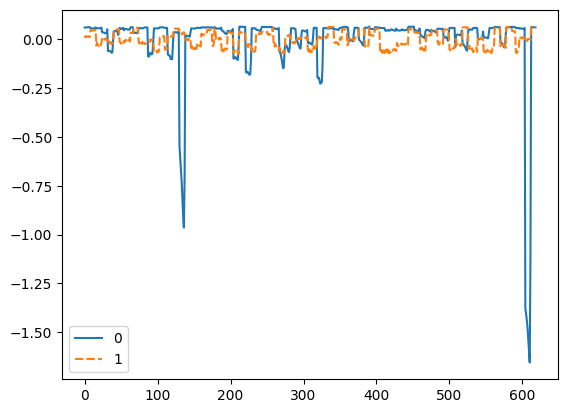

In [229]:
sns.lineplot(data = A.loc[:,[0,1]])

### Interpretation of Principal Components

- PC1 mainly captures overall aviation activity (high loadings on passengers and freight).
- PC2 reflects structural differences between passenger-dominated and freight-dominated countries.
- Countries with high PC1 scores are those with both high traffic and high emissions.


In [230]:
data_gaz = pd.read_csv('/kaggle/input/gaz-effet-serre/API_EN.GHG.ALL.PC.CE.AR5_DS2_en_csv_v2_32372.csv',sep=",",
    quotechar='"',
    encoding='utf-8-sig',
    skiprows=4  )
data_gaz = data_gaz.loc[:,['Country Name','2013', '2014', '2015',	'2016',	'2017',	'2018',	'2019',	'2020']]
data_gaz = data_gaz.dropna()
data_gaz = data_gaz.melt(id_vars='Country Name', var_name='Year', value_name='Total greenhouse gas emissions')
data_gaz['Year'] = data_gaz['Year'].astype(int)
data_gaz

Country Name  Year  Total greenhouse gas emissions
0                           Aruba  2013                        4.164656
1     Africa Eastern and Southern  2013                        2.397932
2                     Afghanistan  2013                        0.861862
3      Africa Western and Central  2013                        1.920572
4                          Angola  2013                        2.874142
...                           ...   ...                             ...
2003                        Samoa  2020                        2.668629
2004                  Yemen, Rep.  2020                        0.909872
2005                 South Africa  2020                        8.944655
2006                       Zambia  2020                        1.434678
2007                     Zimbabwe  2020                        1.724145

[2008 rows x 3 columns]

In [231]:
# Normalisation de la colonne 'Country Name' dans data_gaz
data_gaz['Country Name Normalized'] = data_gaz['Country Name'].apply(normalize_country)
data_gaz.head()

Country Name  Year  Total greenhouse gas emissions  \
0                        Aruba  2013                        4.164656   
1  Africa Eastern and Southern  2013                        2.397932   
2                  Afghanistan  2013                        0.861862   
3   Africa Western and Central  2013                        1.920572   
4                       Angola  2013                        2.874142   

       Country Name Normalized  
0                        aruba  
1  africa eastern and southern  
2                  afghanistan  
3   africa western and central  
4                       angola

In [232]:
final_matrice = pd.merge( A,data_gaz,on=['Country Name Normalized', 'Year'])
final_matrice = final_matrice.rename(columns = {0 : 'Axe1', 1 : 'Axe2'})
final_matrice

final_matrice_standardized = final_matrice.set_index(['Year','Country Name Normalized'])
final_matrice_standardized = final_matrice_standardized.loc[:,['Axe1','Axe2','Total greenhouse gas emissions']]

n = len(final_matrice_standardized) - 1

# Standardisation de la colonne
final_matrice_standardized = ( final_matrice_standardized - final_matrice_standardized.mean() ) / ( final_matrice_standardized.std() * n**(1/2) )

# Affichage du résultat
# print('final_matice',final_matrice.head(3))
print('final_matice_standardized', final_matrice_standardized.head(5))

final_matice_standardized                                   Axe1      Axe2  \
Year Country Name Normalized                       
2013 afghanistan              0.012474  0.008102   
2014 afghanistan              0.012606  0.016288   
2015 afghanistan              0.012622  0.012849   
2016 afghanistan              0.012664  0.014616   
2017 afghanistan              0.012681  0.015233   

                              Total greenhouse gas emissions  
Year Country Name Normalized                                  
2013 afghanistan                                   -0.043535  
2014 afghanistan                                   -0.043718  
2015 afghanistan                                   -0.043903  
2016 afghanistan                                   -0.044206  
2017 afghanistan                                   -0.044147  


<Axes: ylabel='Year-Country Name Normalized'>

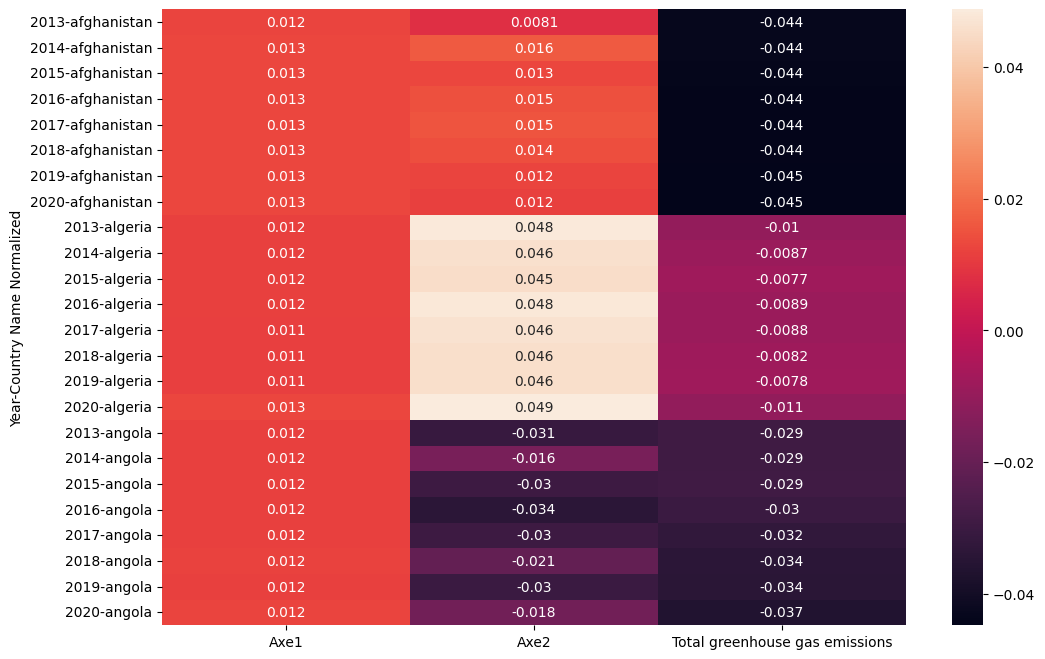

In [233]:
plt.figure(figsize = (12,8))
sns.heatmap(data = final_matrice_standardized.head(24), annot=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

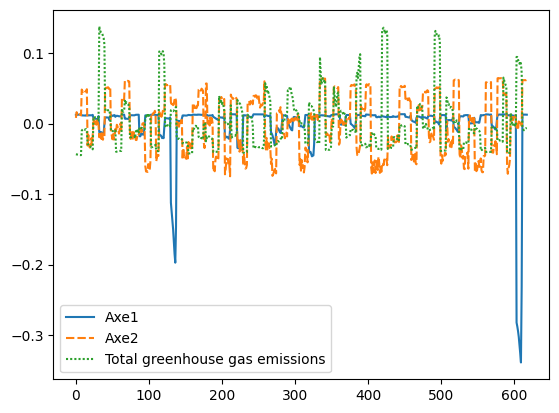

In [234]:
final_matrice_standardized_num = final_matrice_standardized.reset_index().loc[:,['Axe1','Axe2','Total greenhouse gas emissions']]
sns.lineplot(data = final_matrice_standardized_num)

La figure montre que les émissions totales de gaz à effet de serre liées à l'aviation suivent de près le premier composant principal (PC1), qui capture l'ampleur globale de l'activité aérienne. En revanche, le deuxième composant principal (PC2), reflétant les différences structurelles entre les systèmes orientés passagers et fret, présente une co-mouvement limitée avec les émissions. Cela suggère que les niveaux d'émissions sont principalement déterminés par le volume d'activité plutôt que par la structure du trafic aérien, soulignant l'importance des indicateurs basés sur l'intensité lors de la comparaison entre pays.

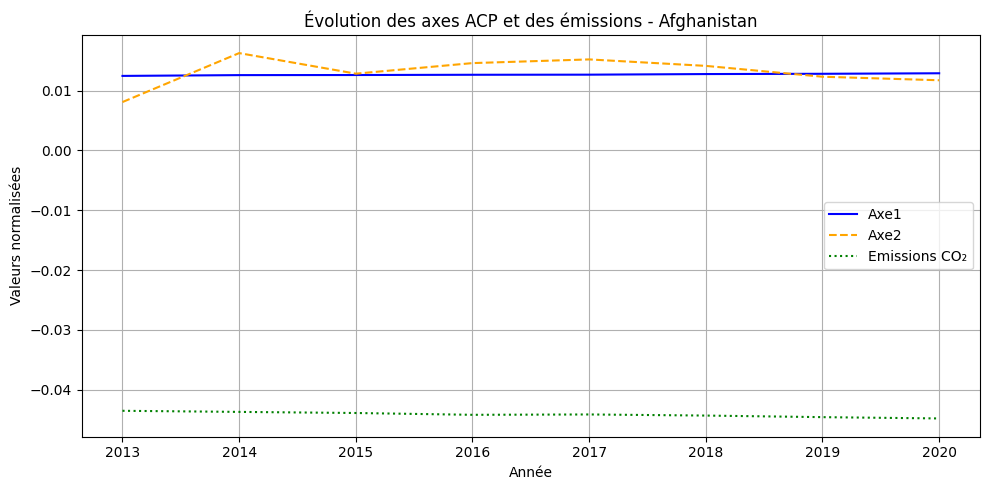

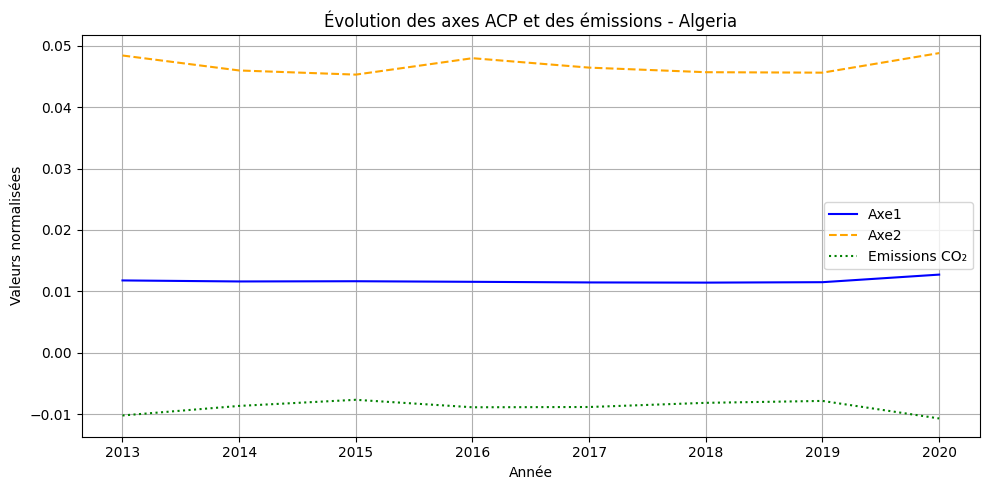

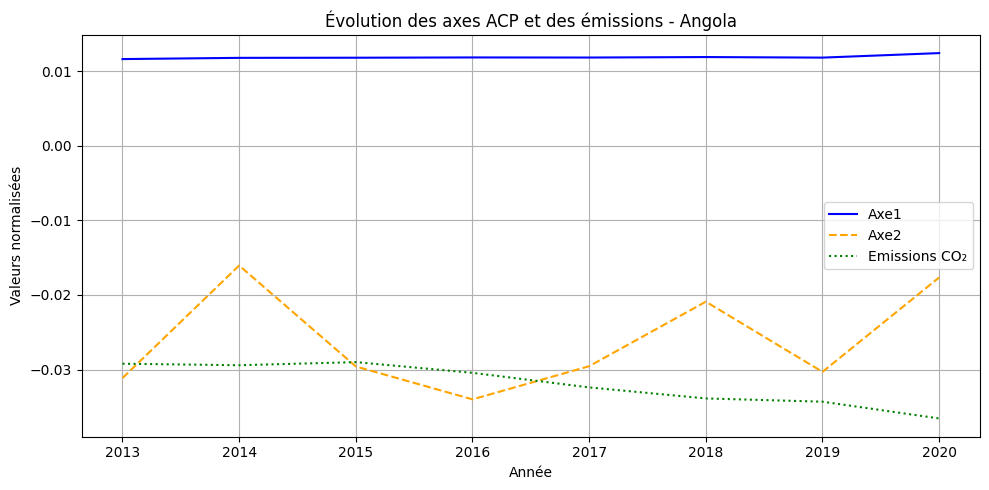

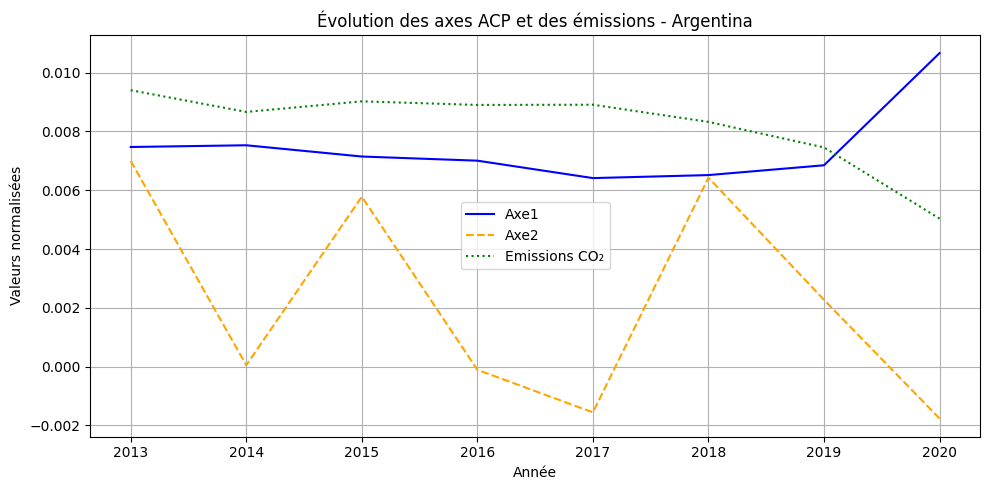

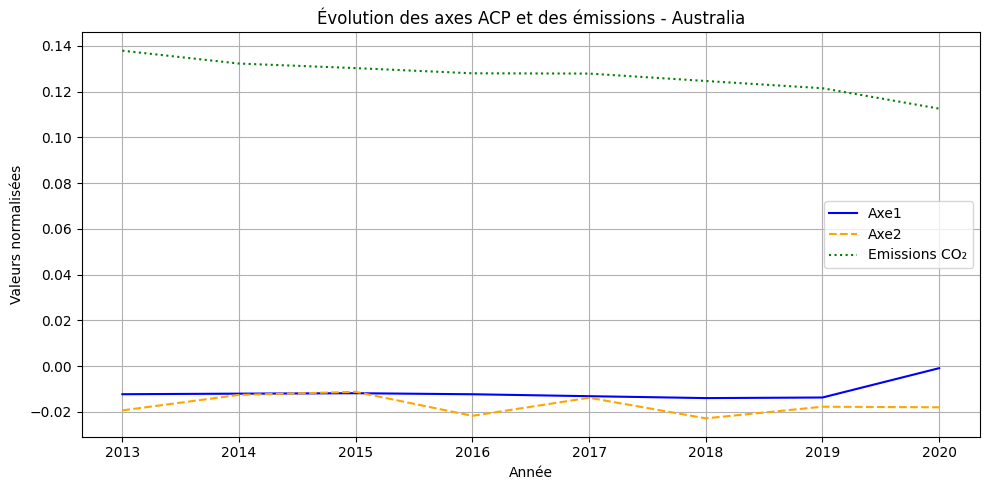

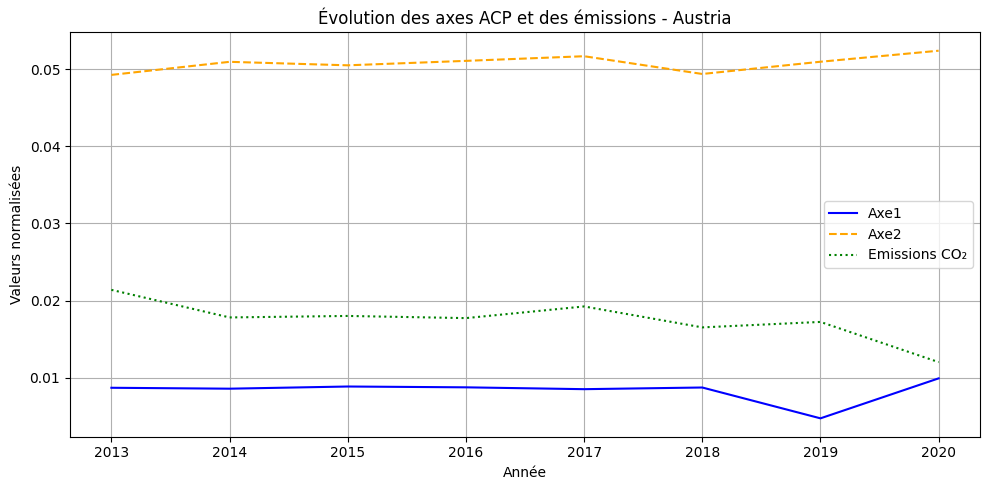

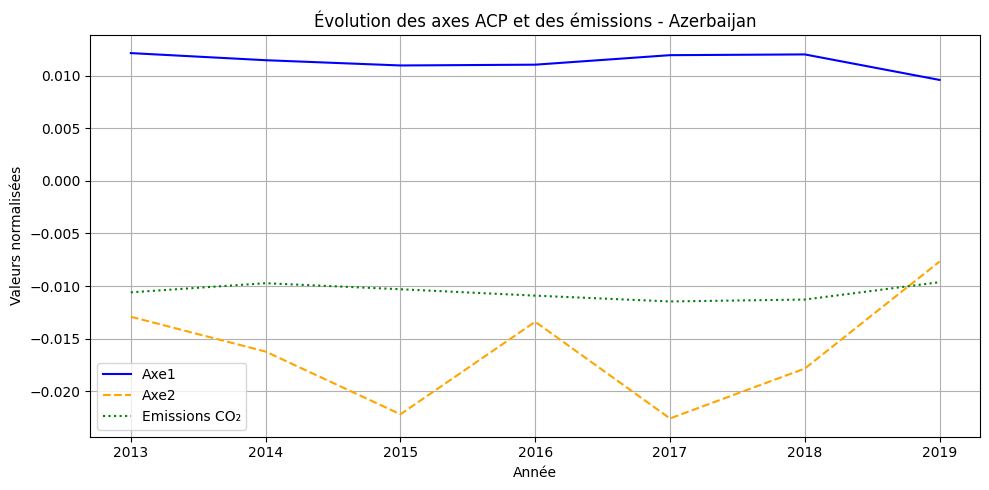

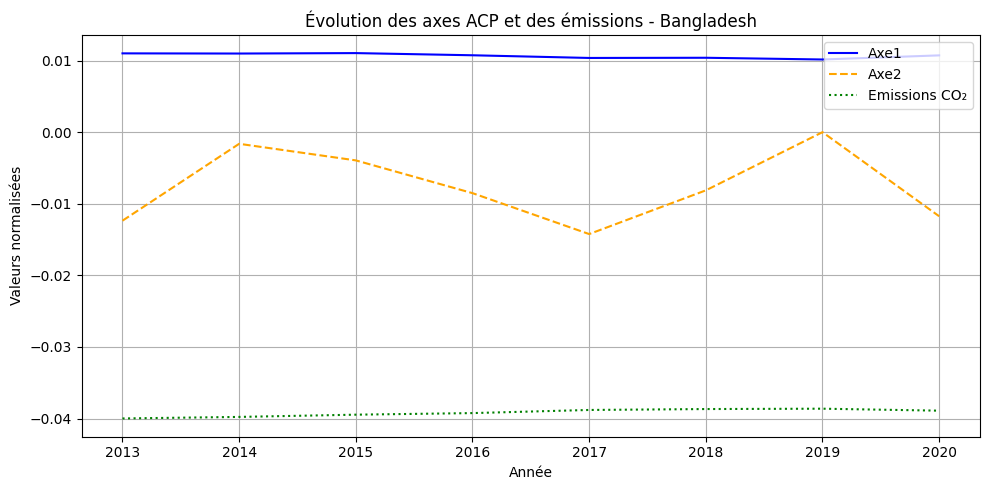

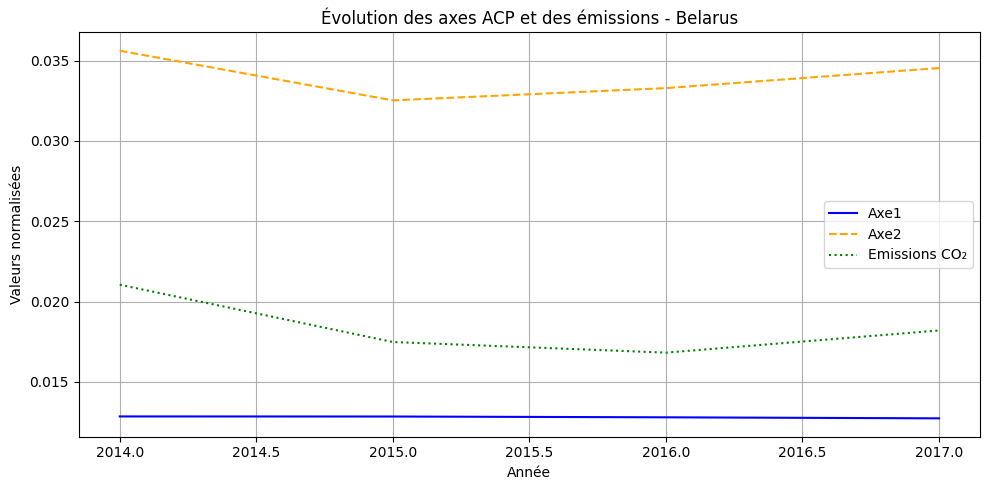

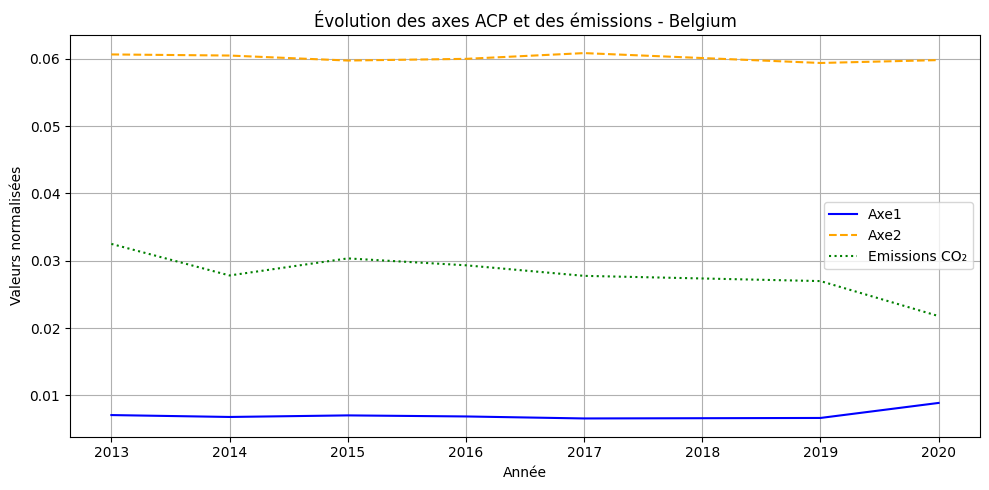

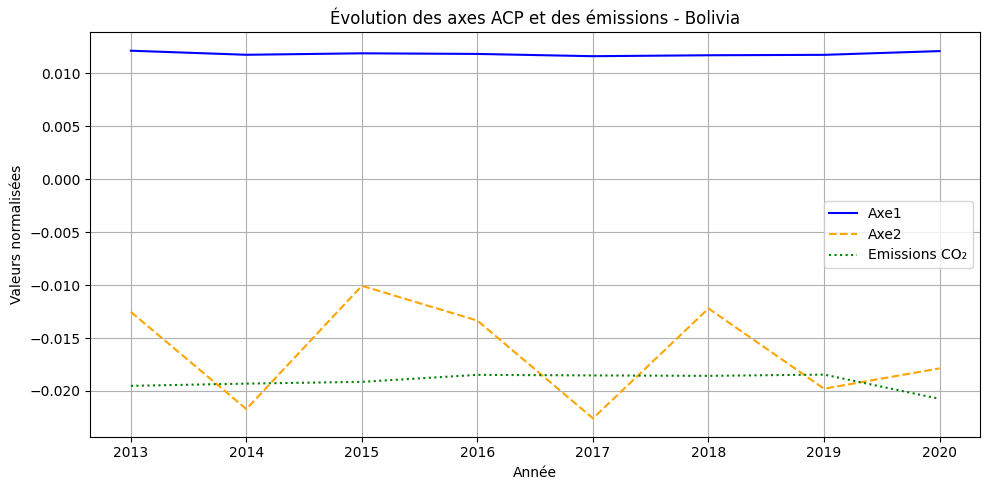

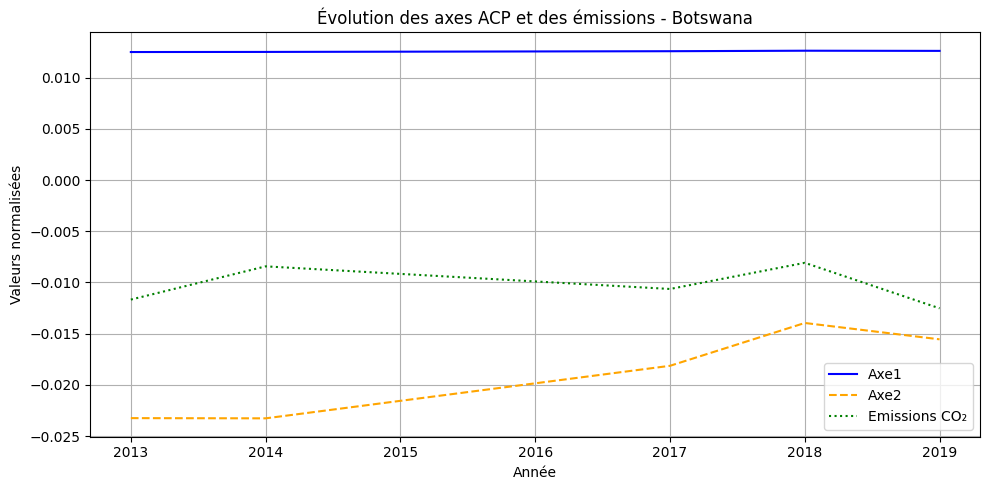

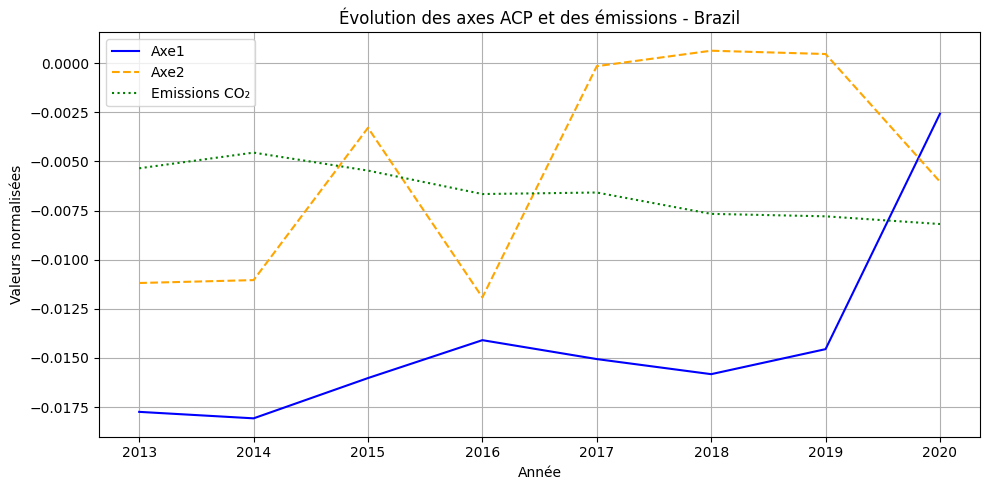

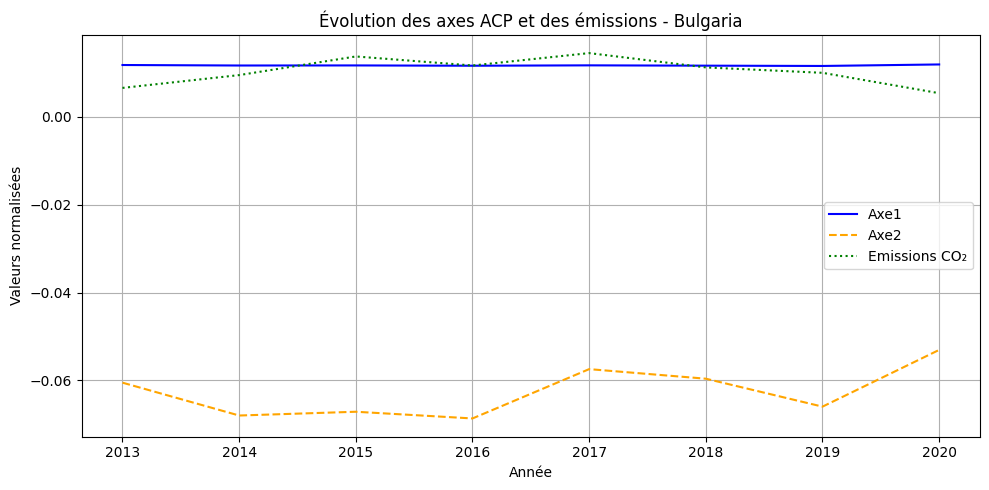

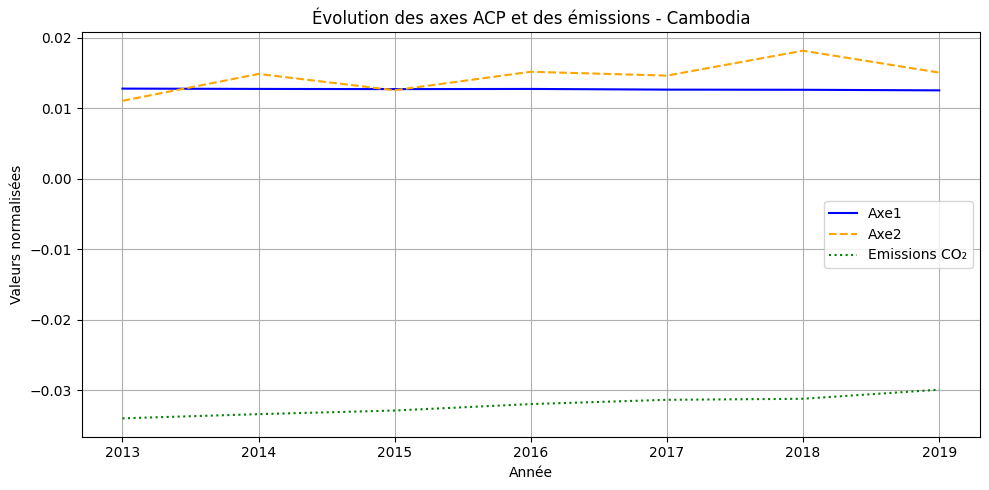

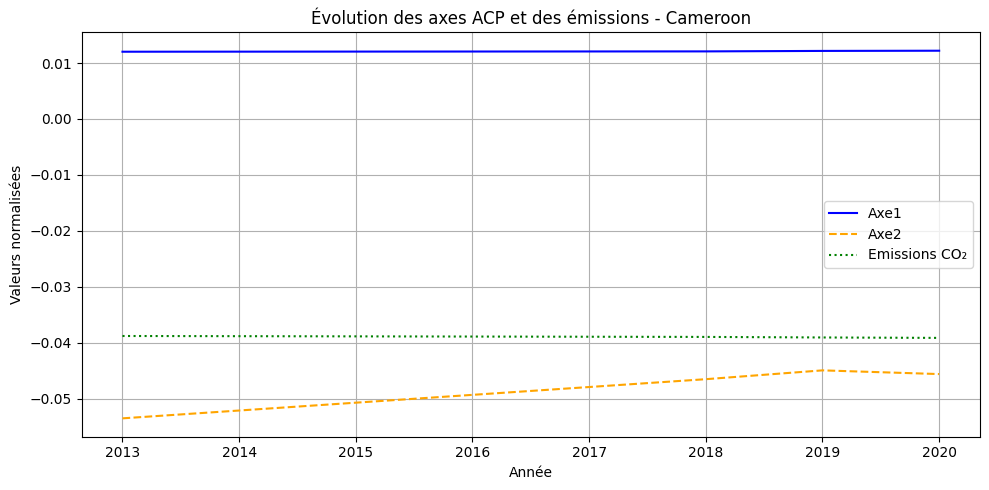

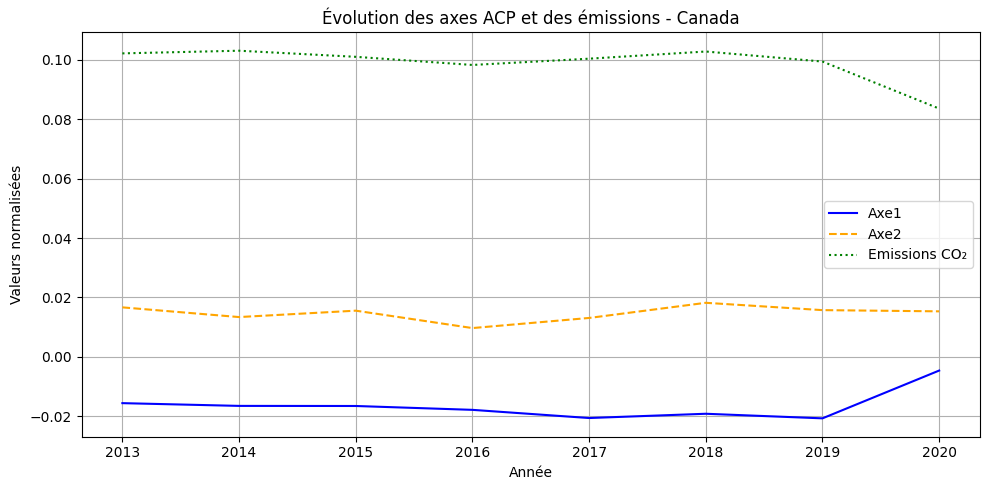

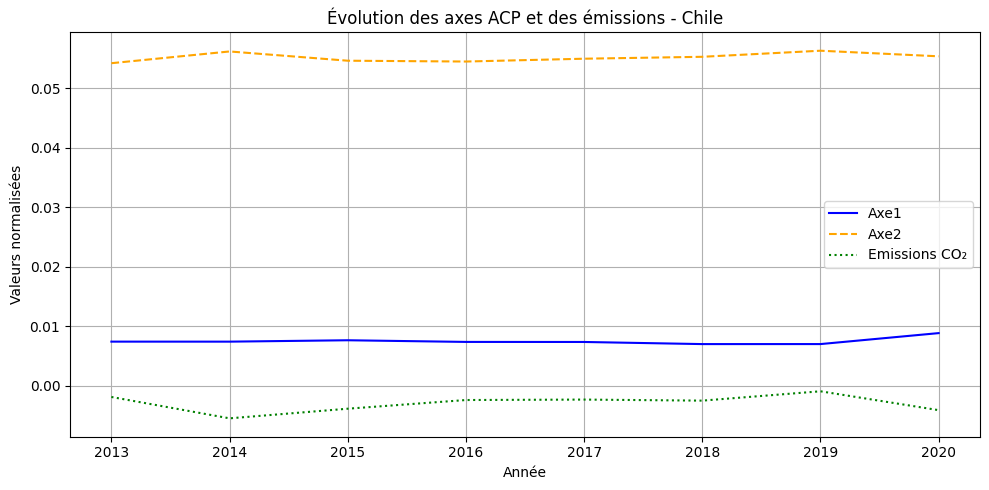

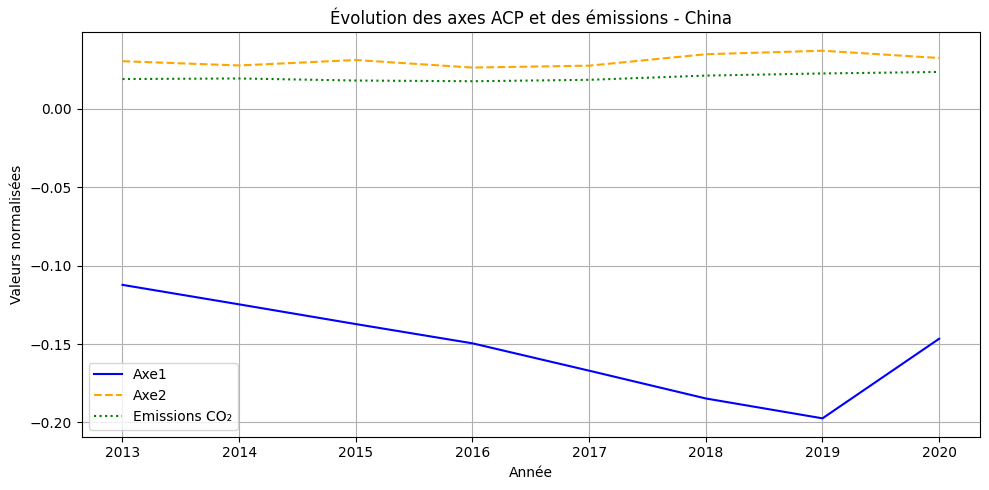

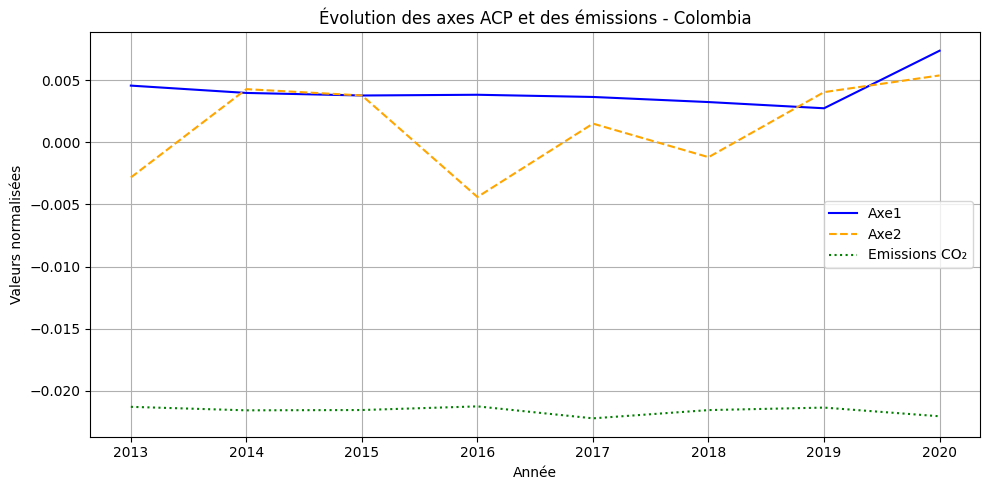

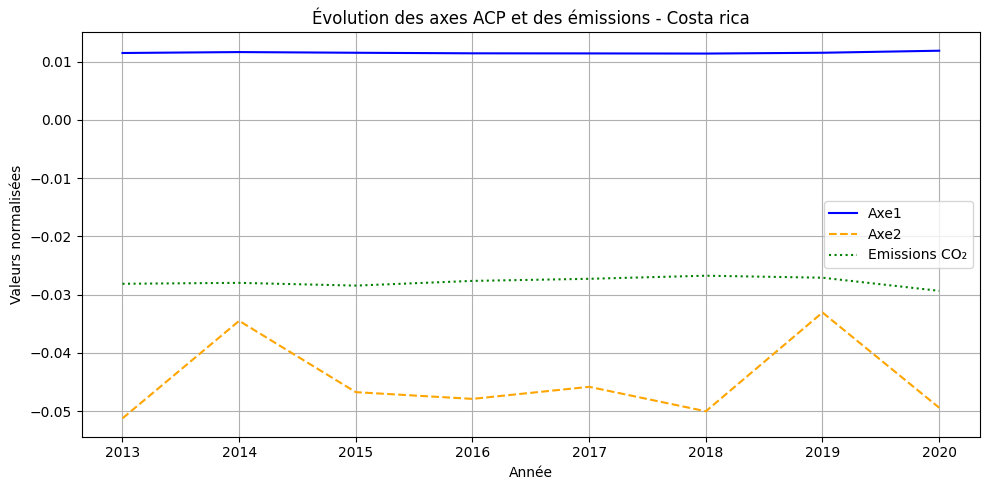

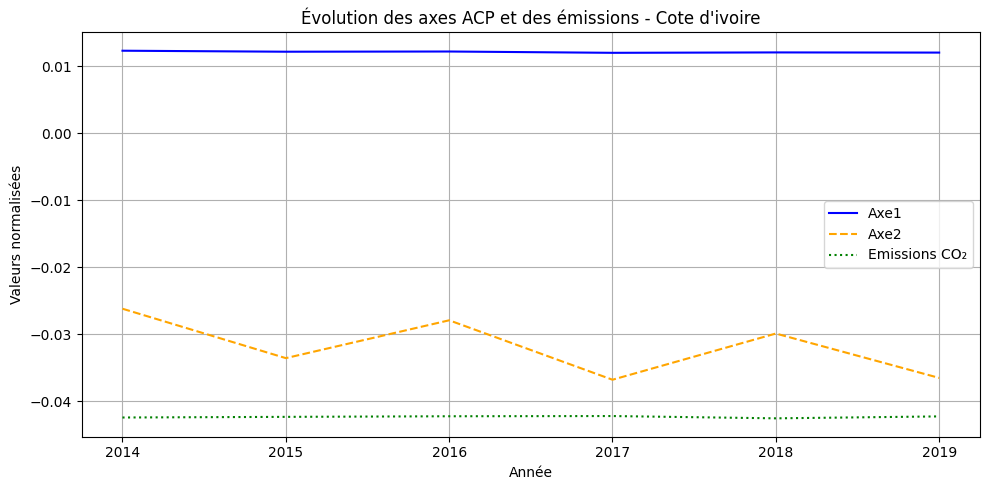

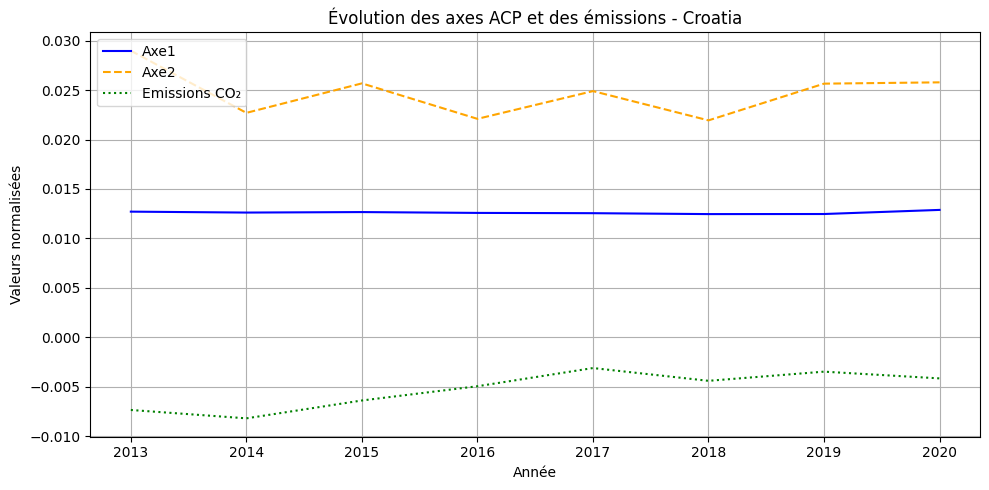

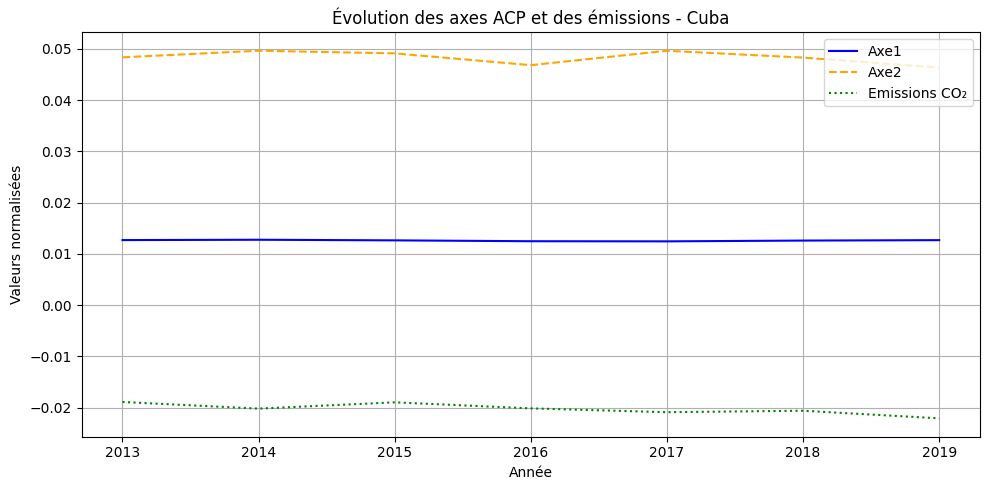

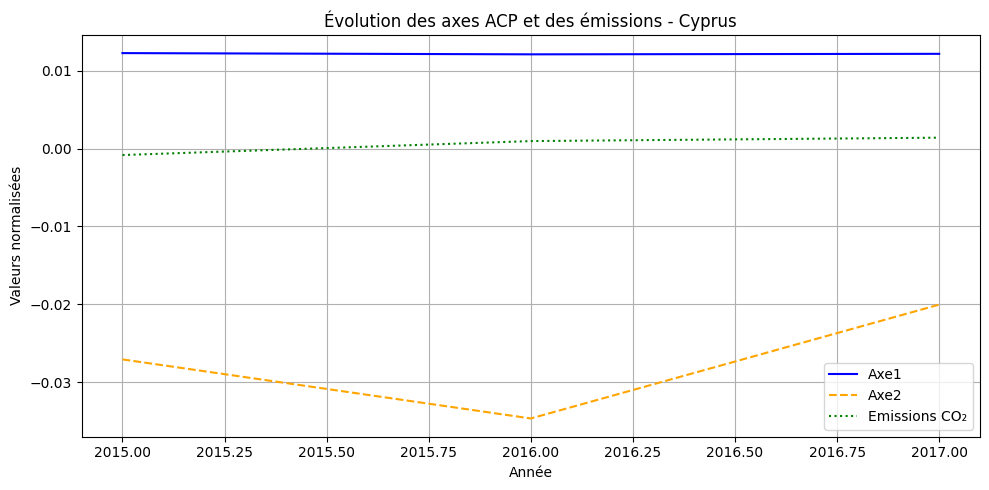

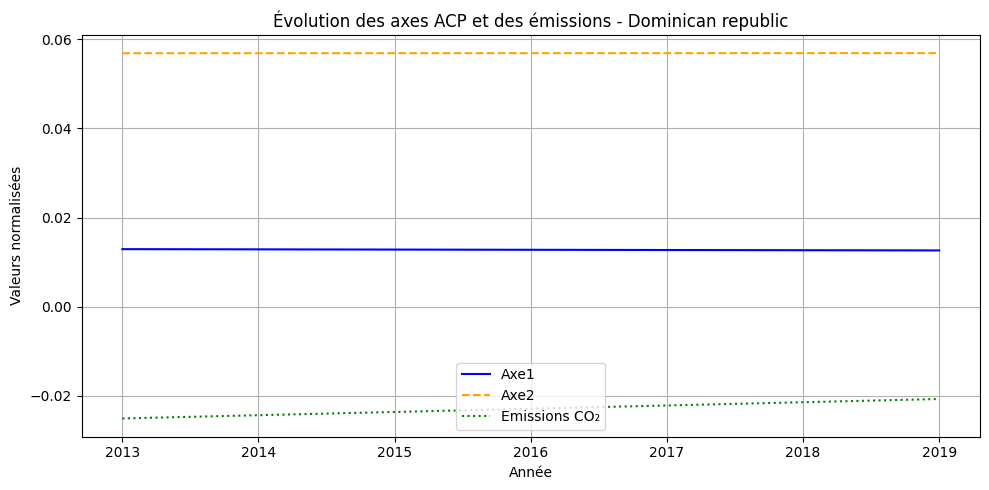

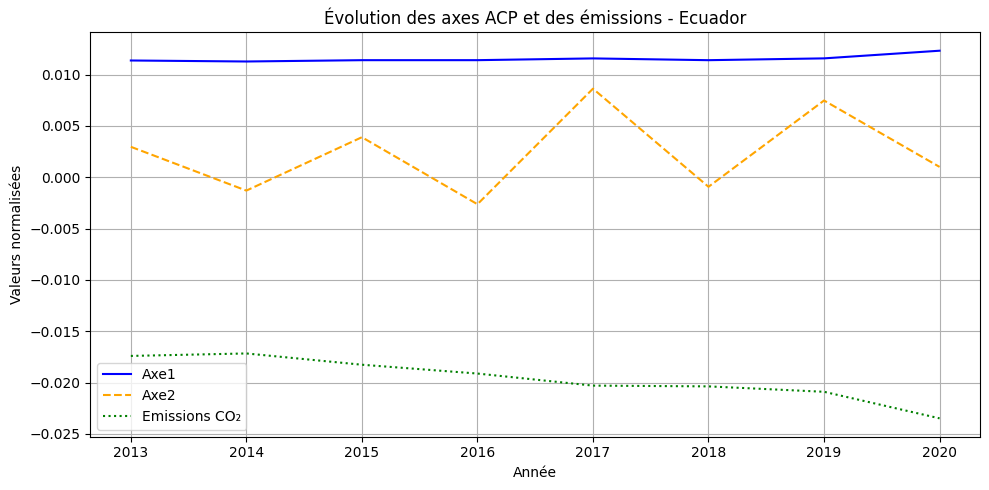

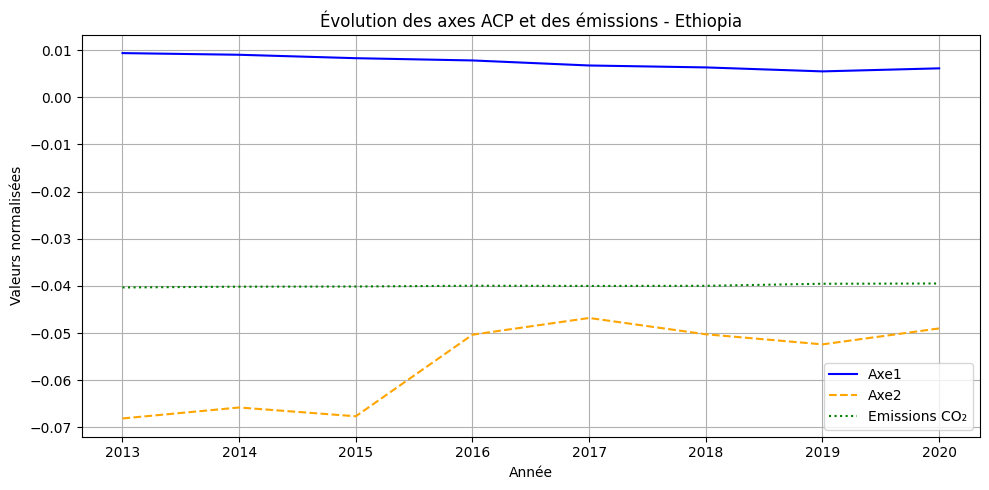

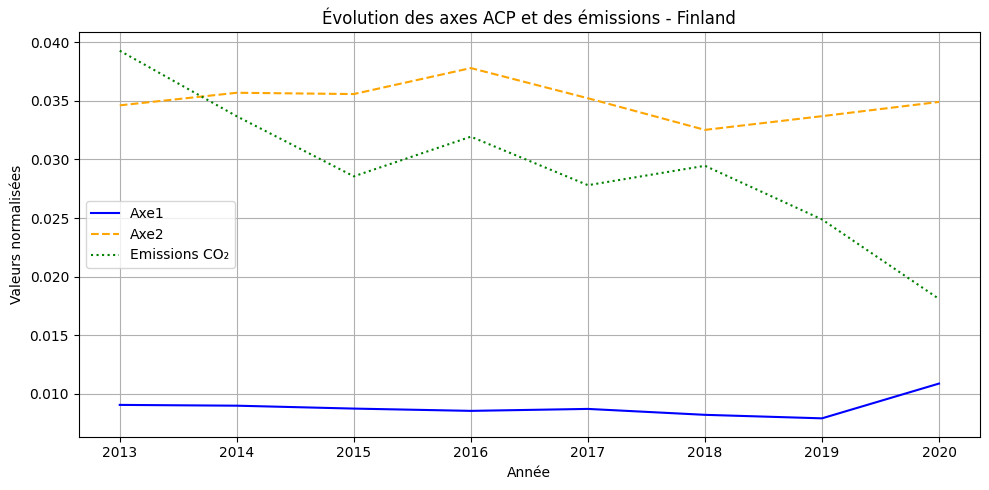

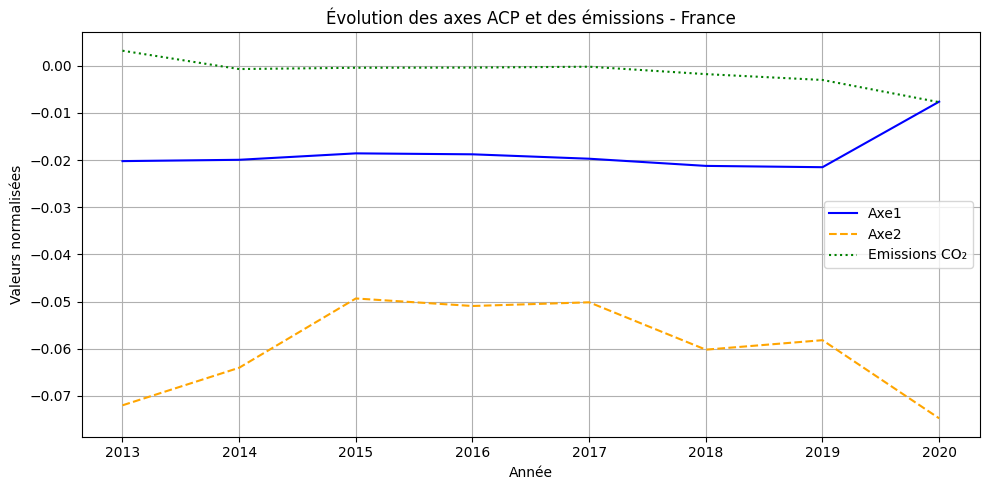

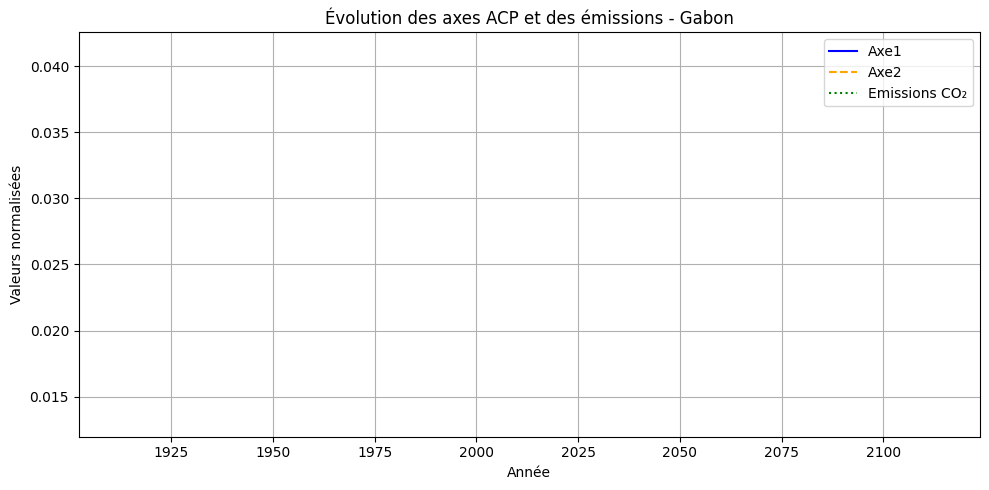

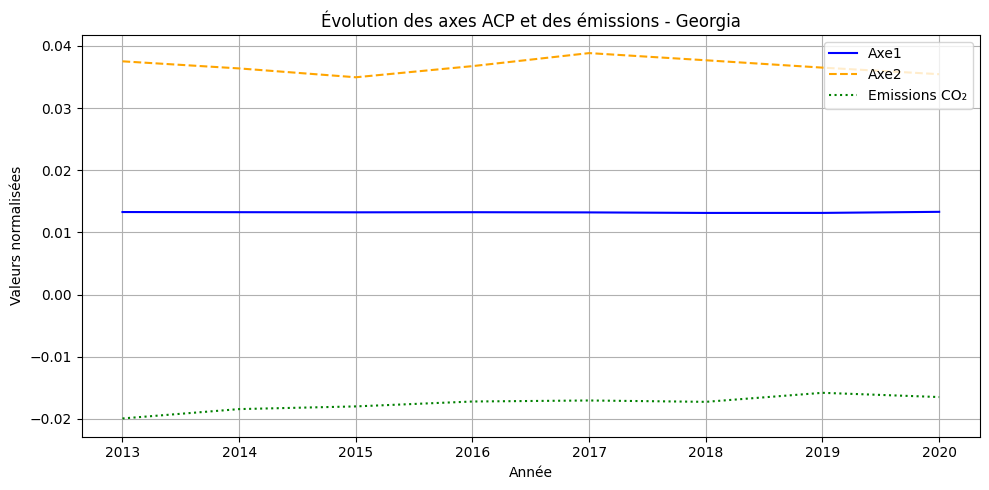

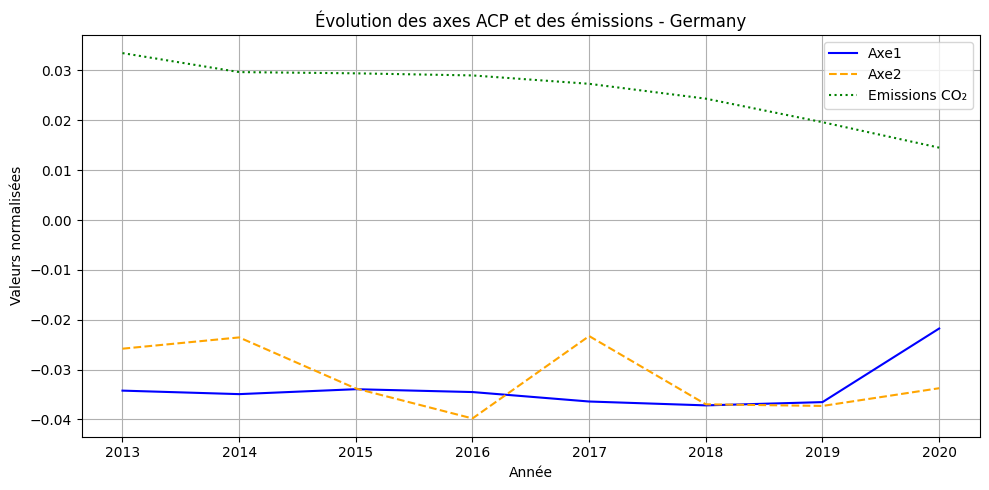

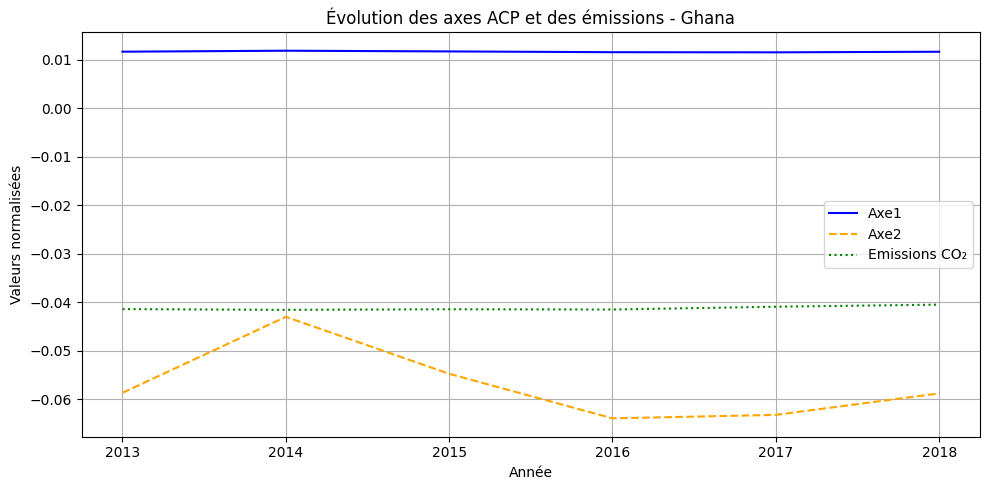

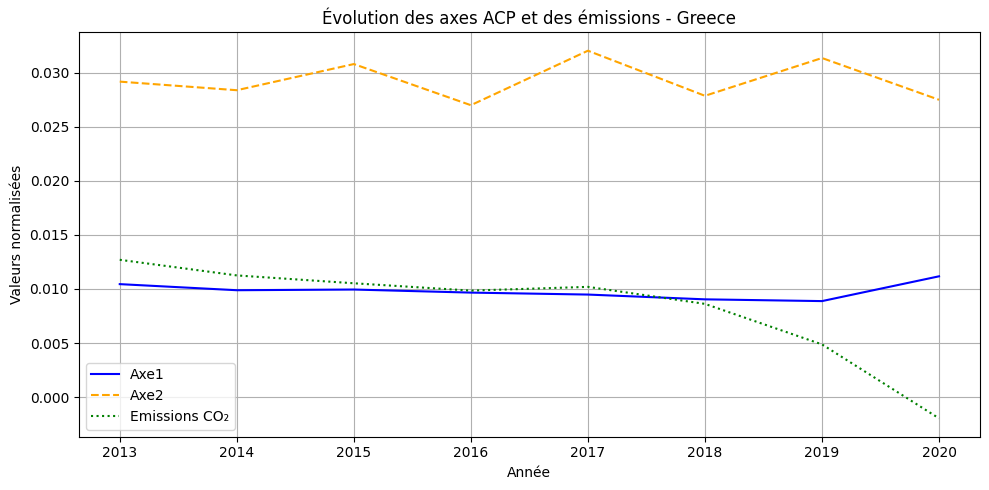

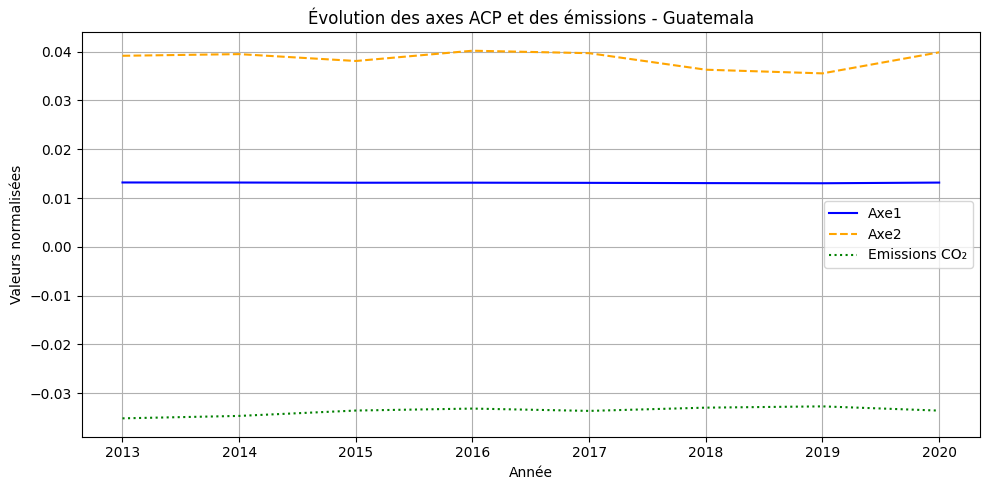

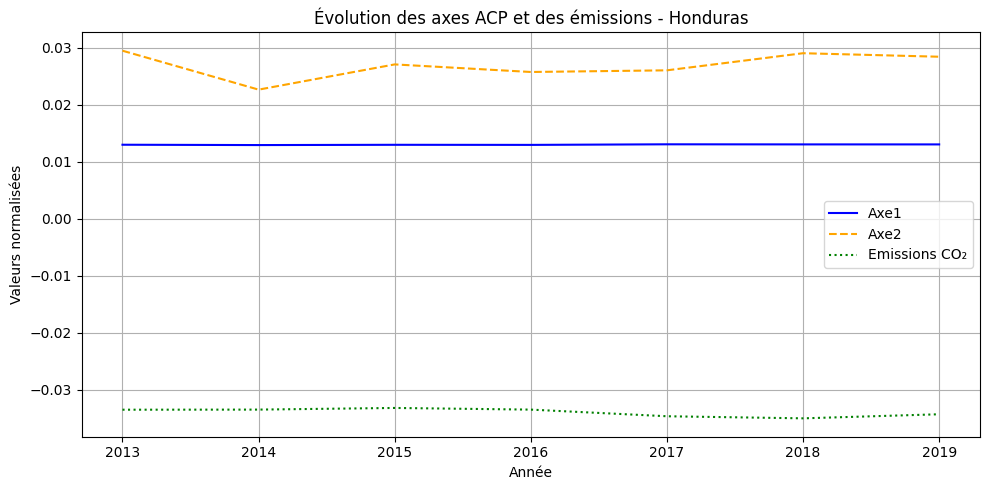

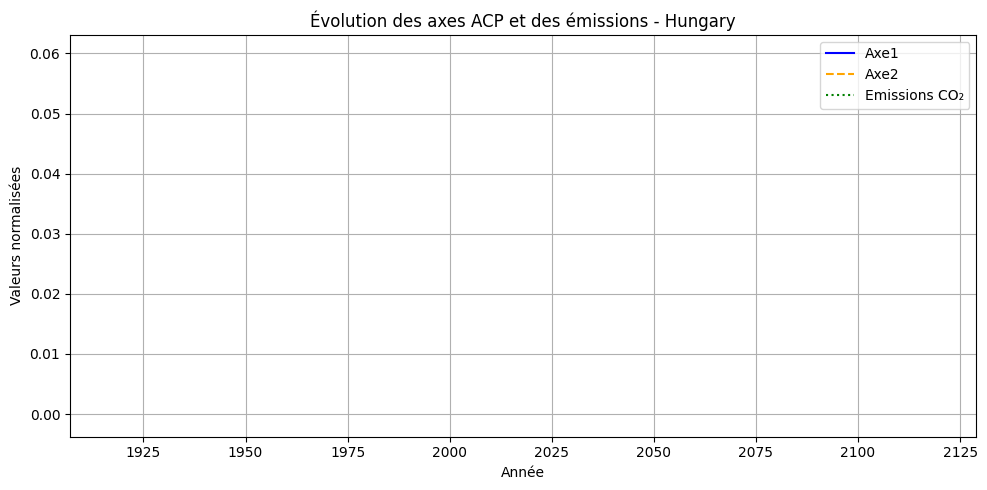

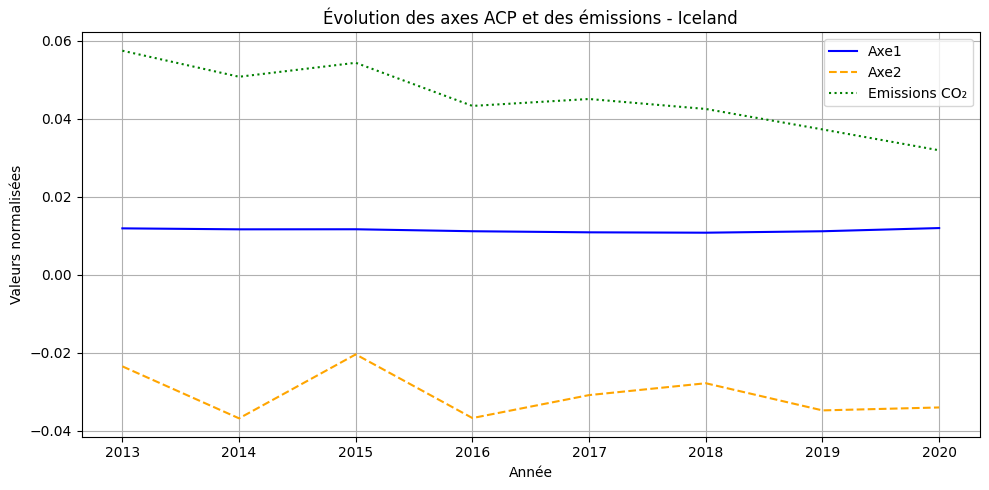

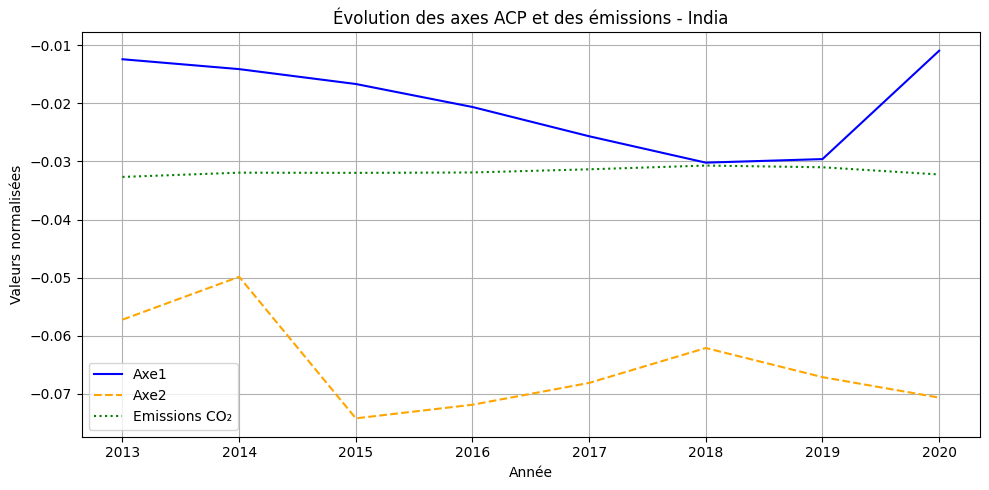

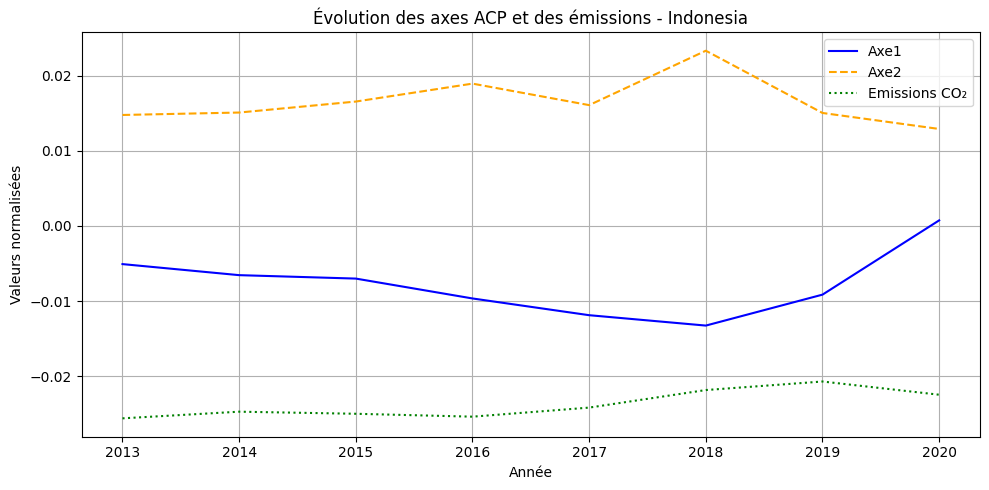

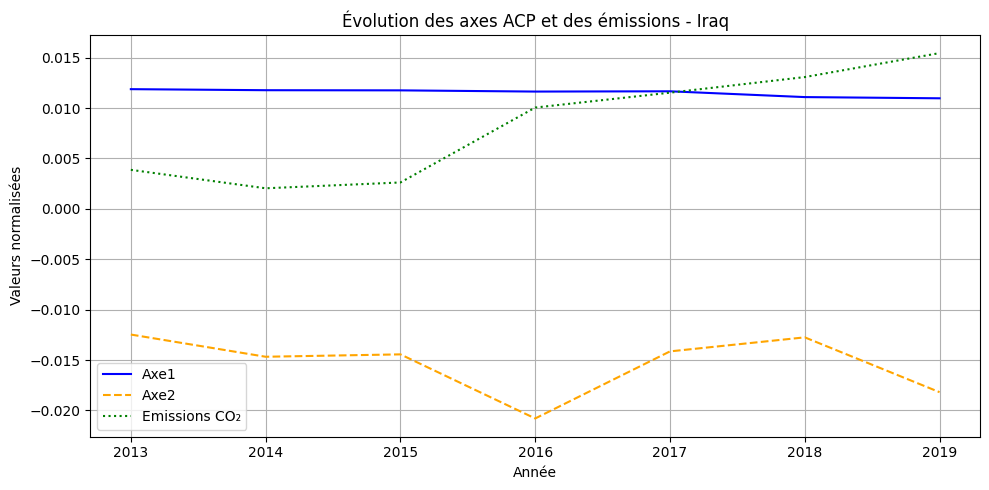

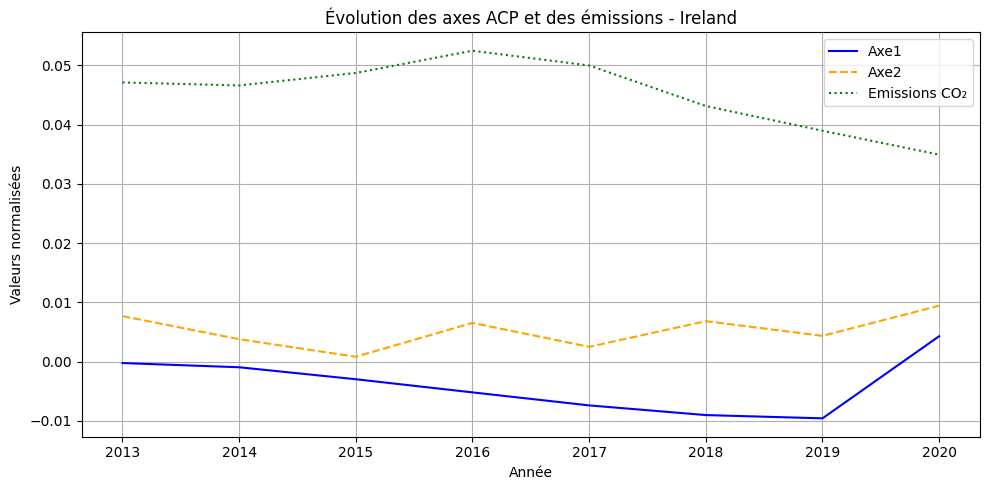

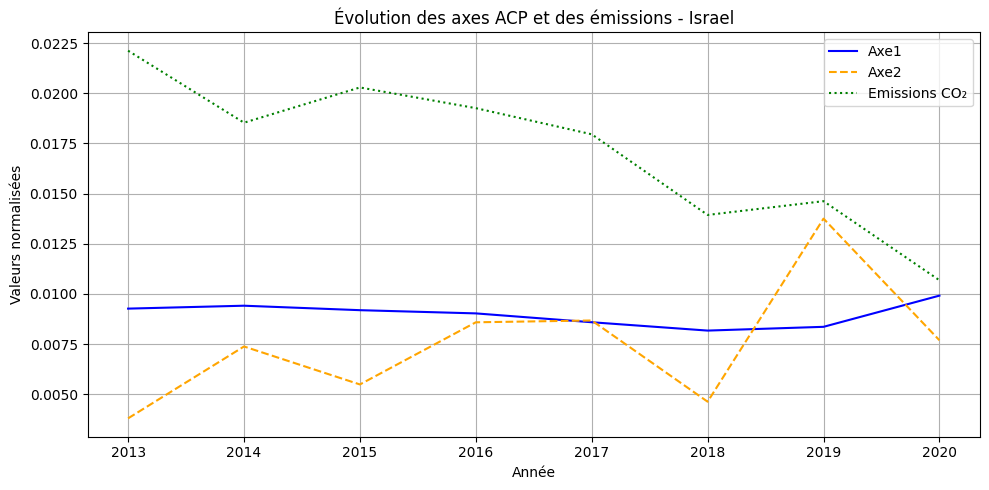

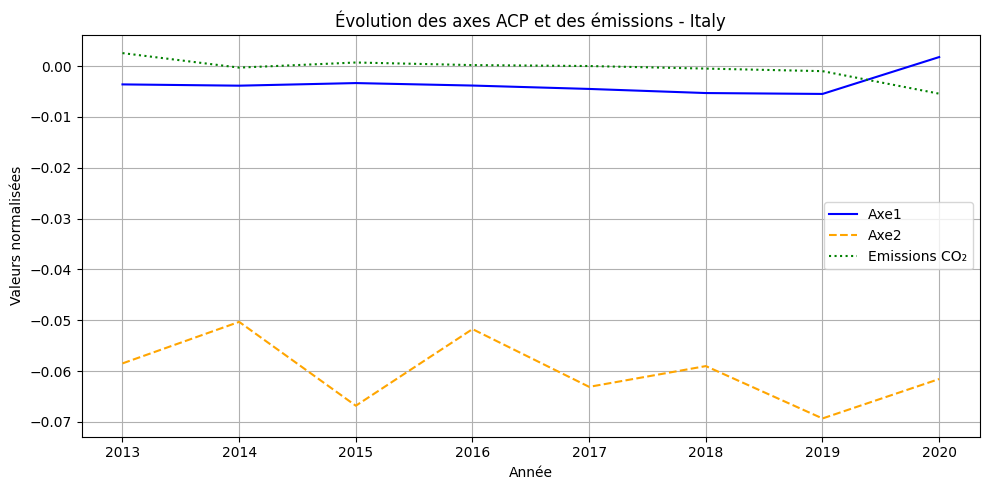

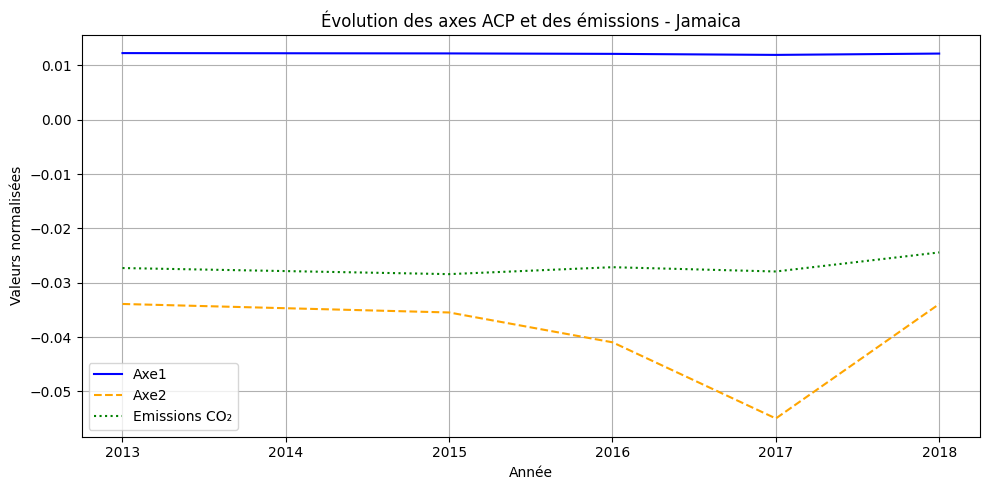

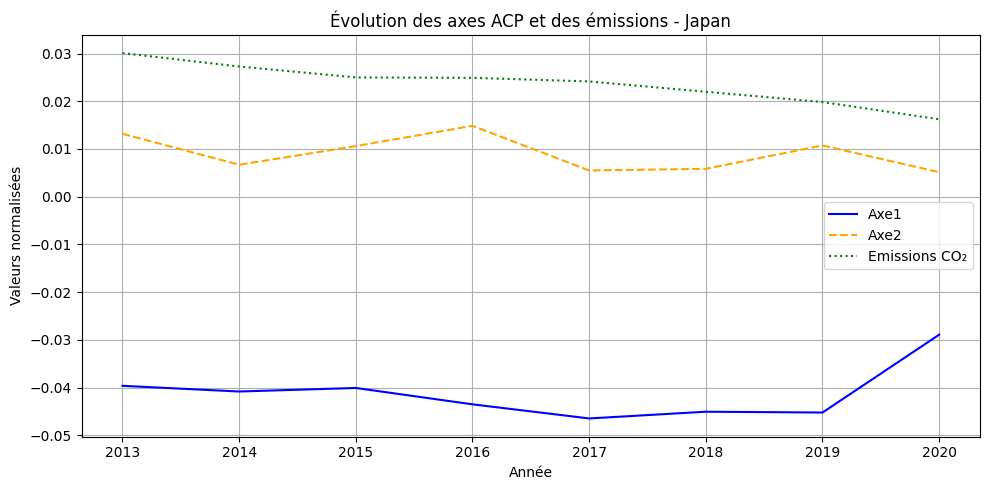

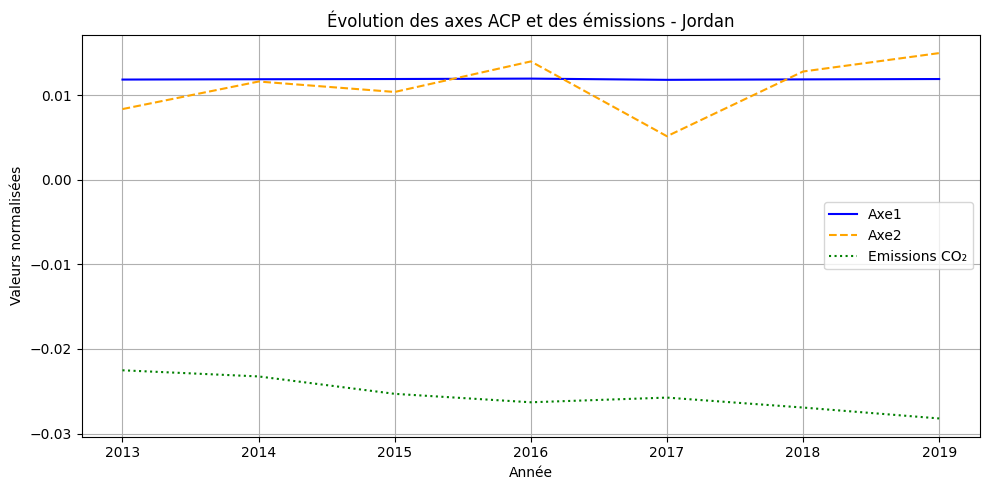

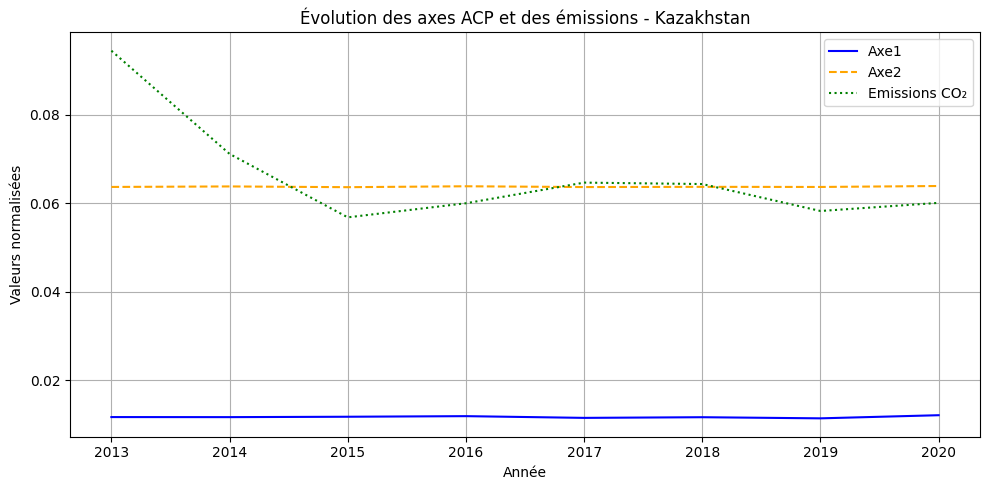

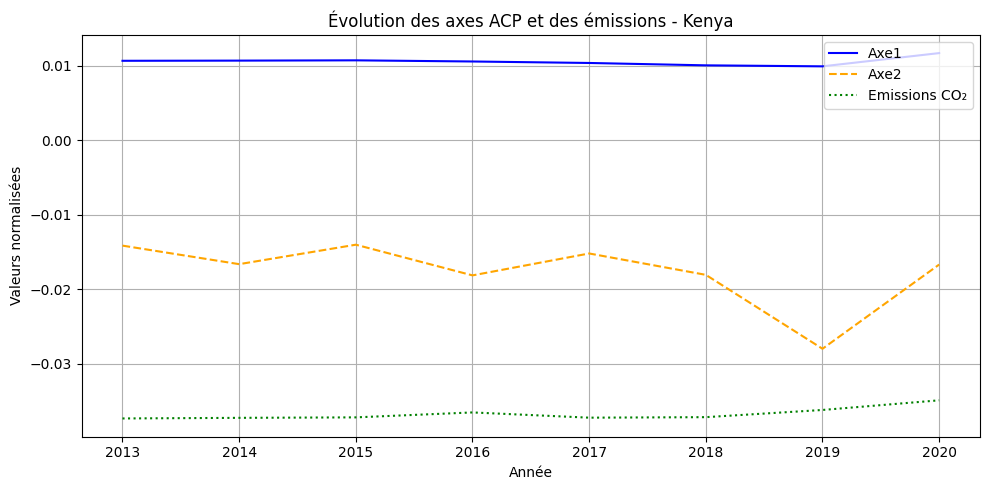

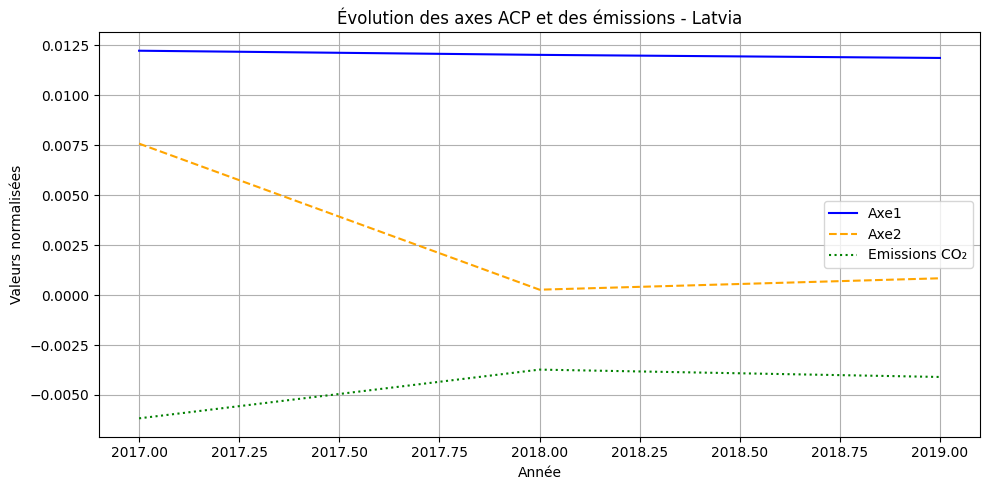

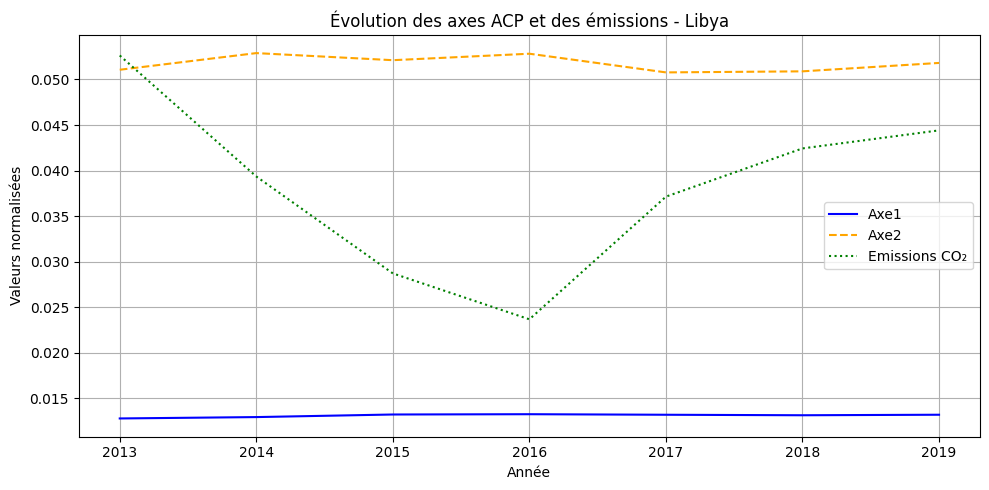

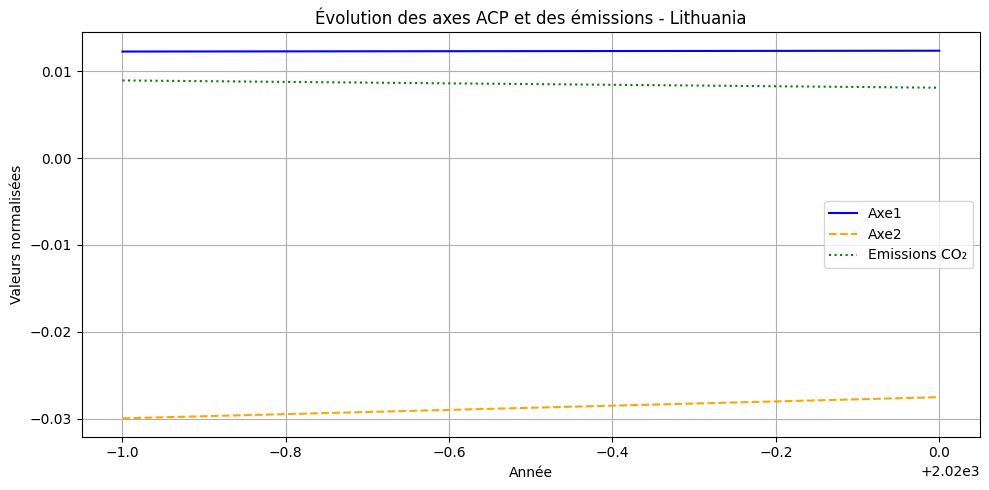

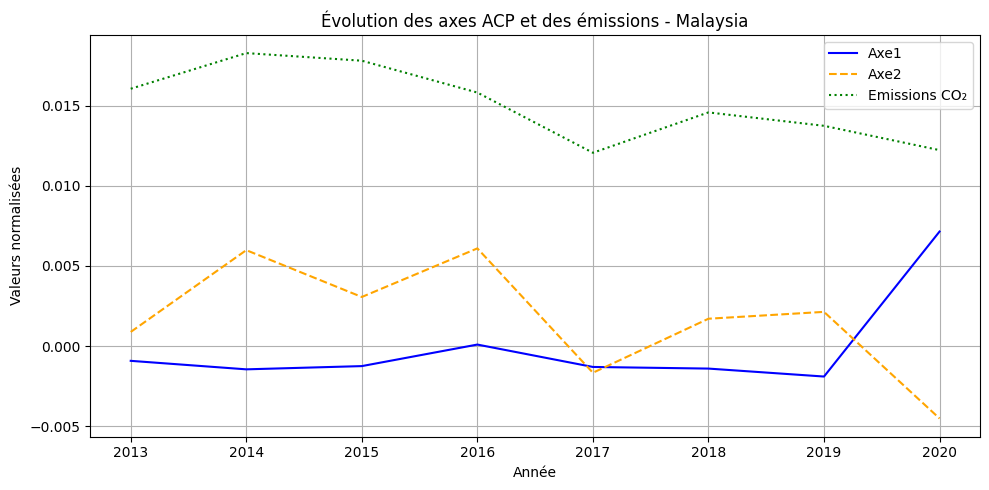

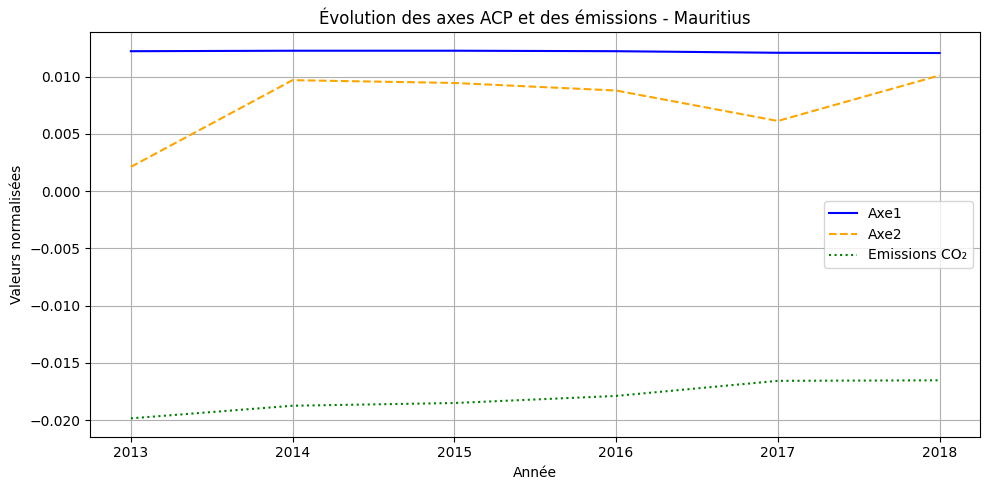

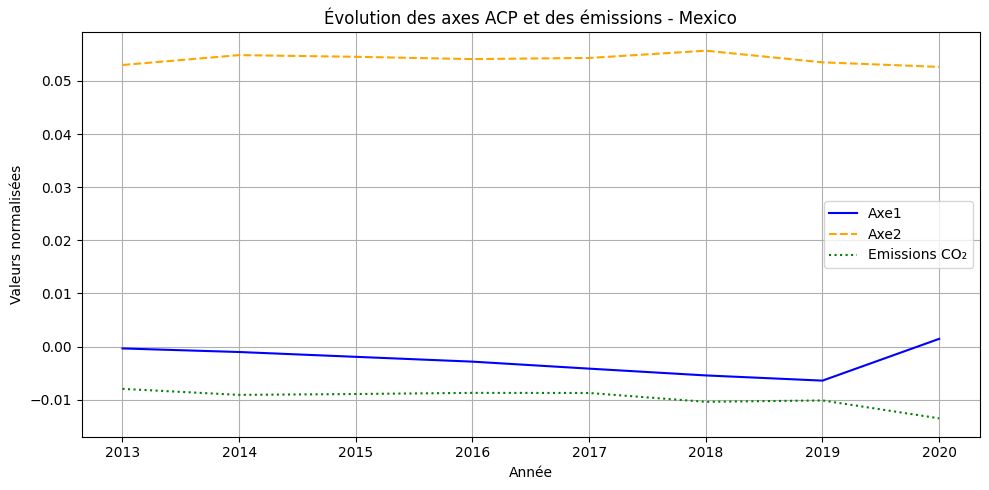

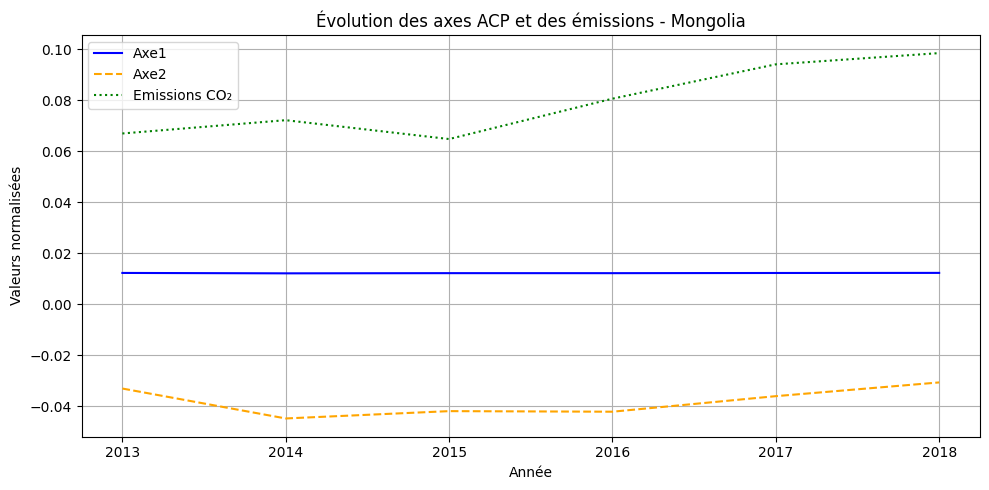

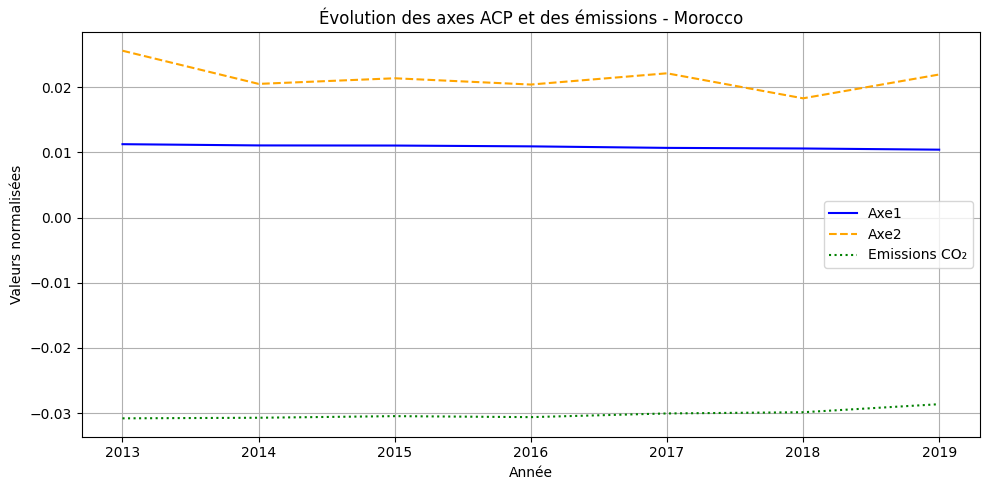

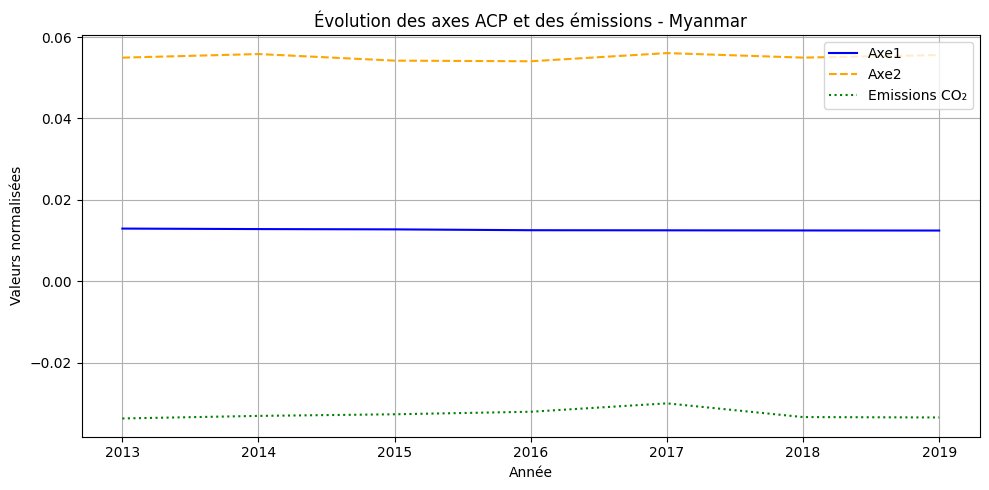

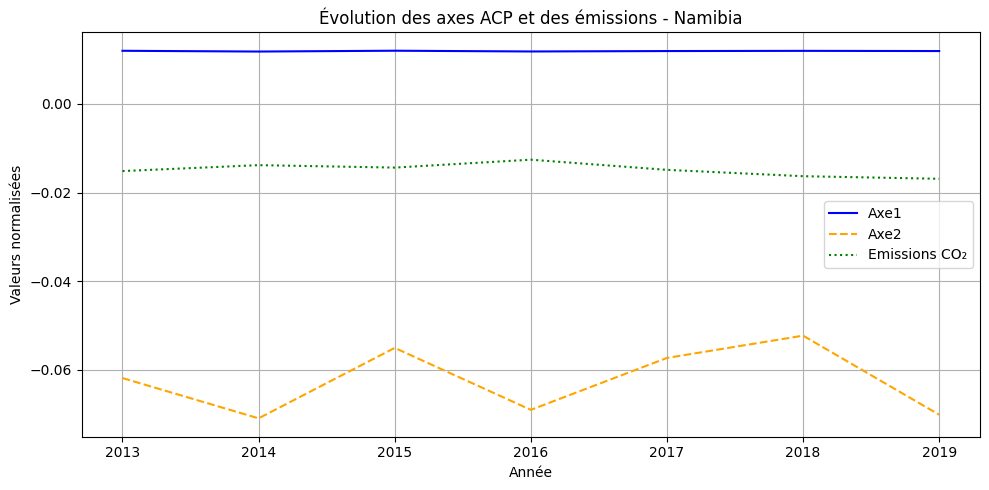

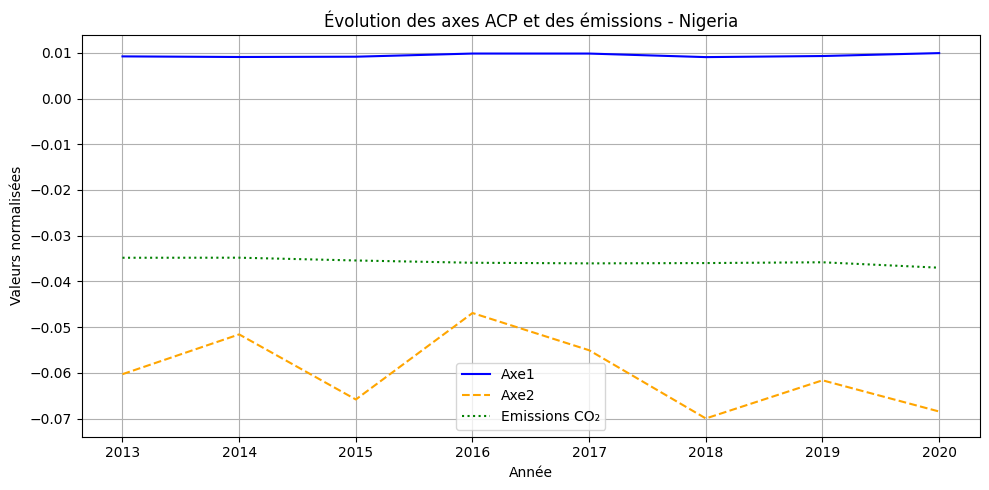

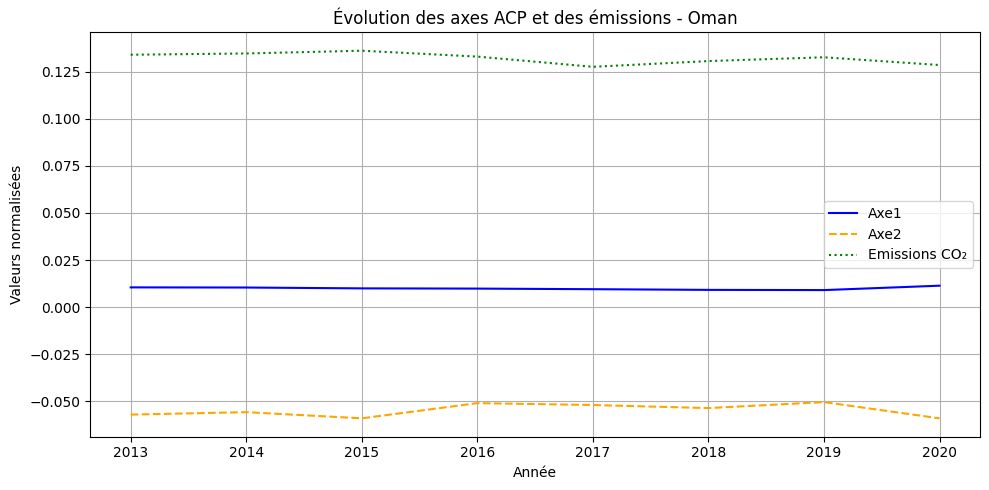

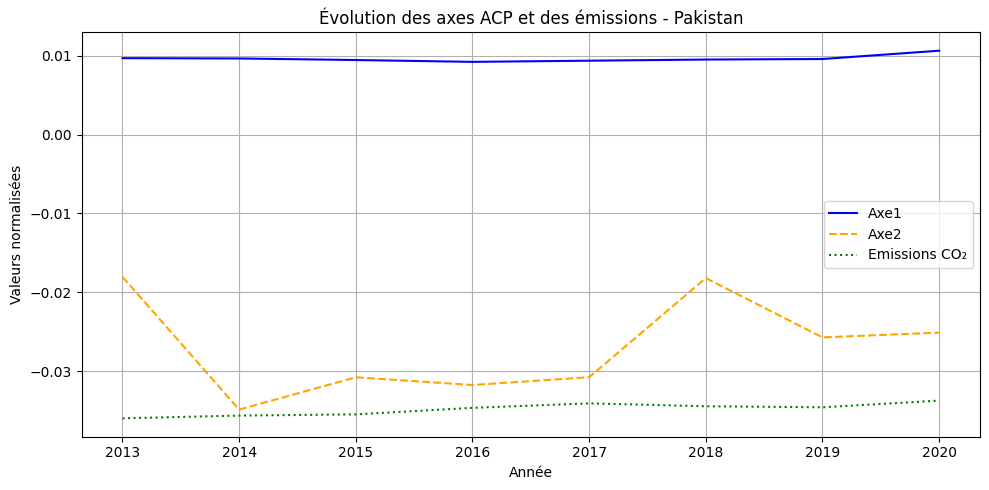

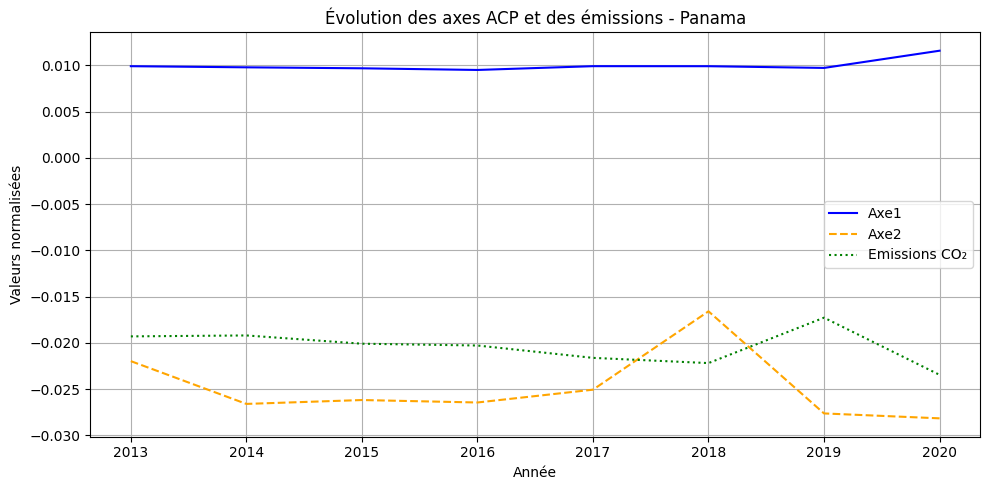

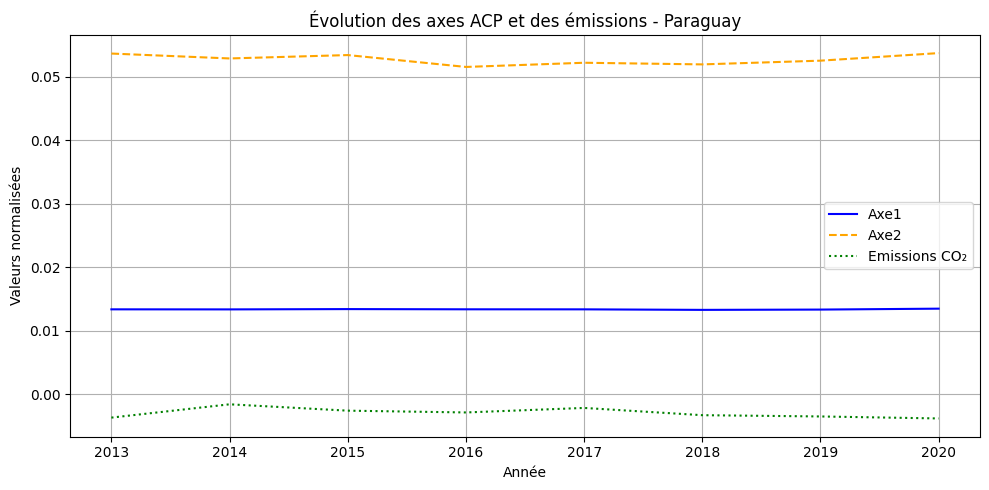

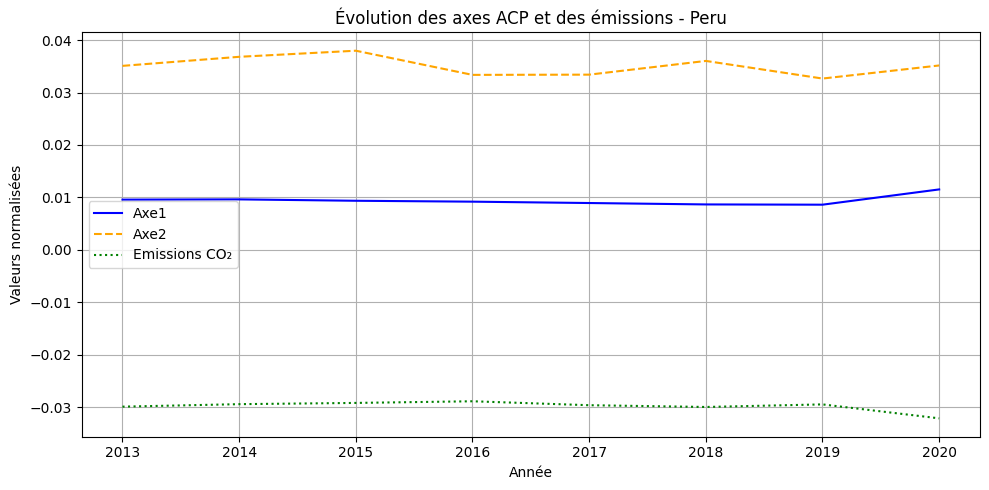

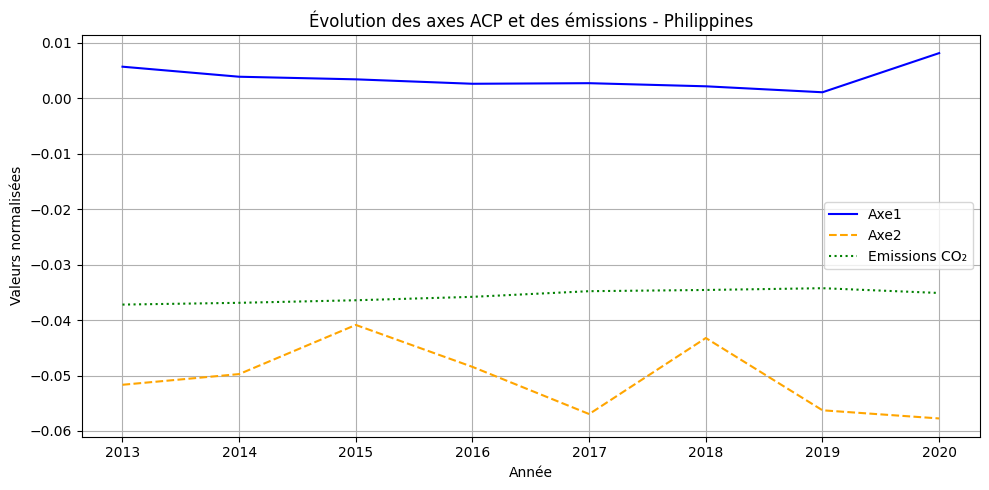

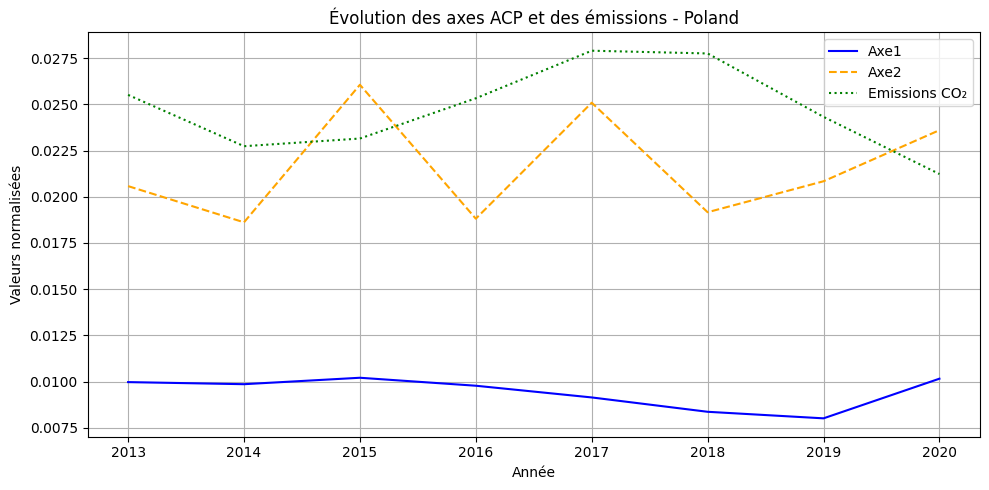

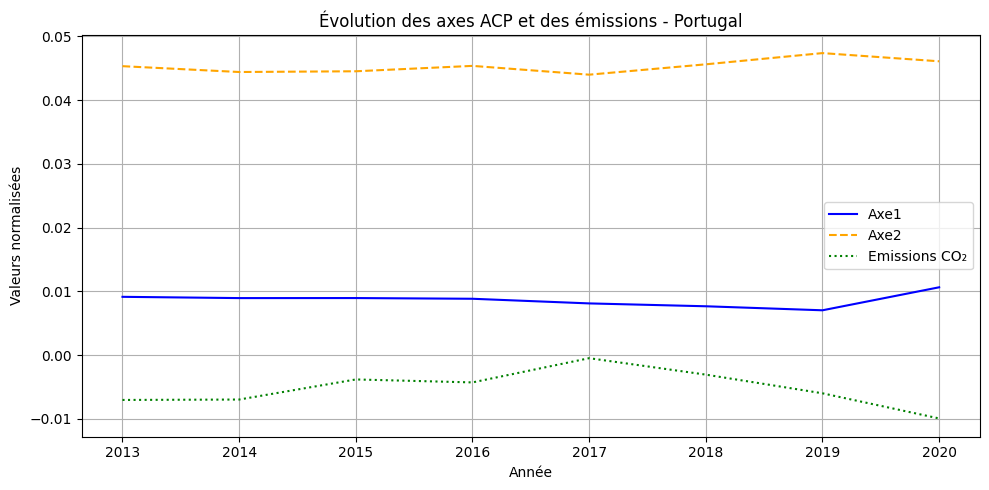

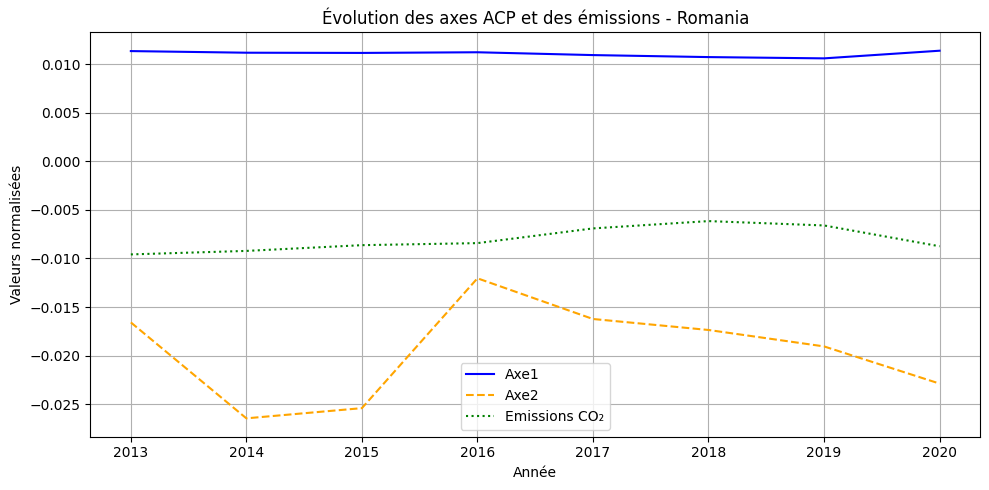

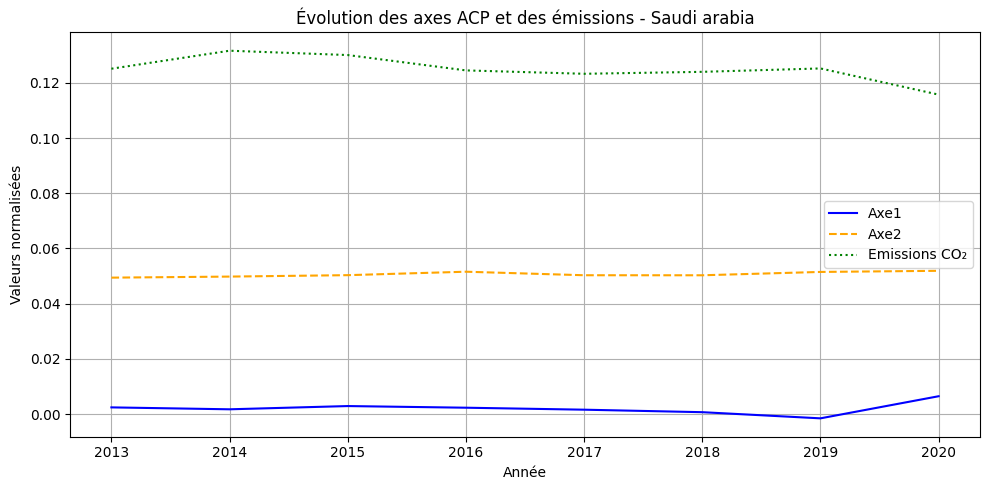

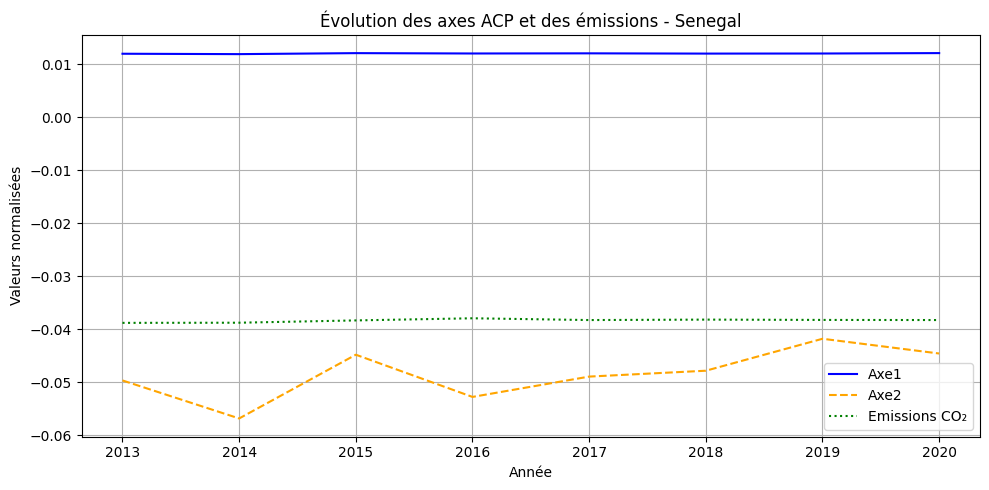

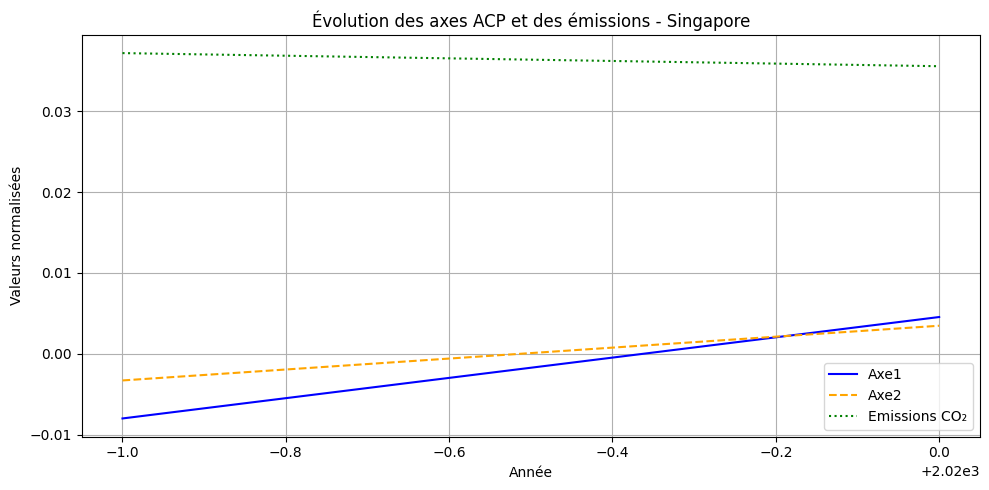

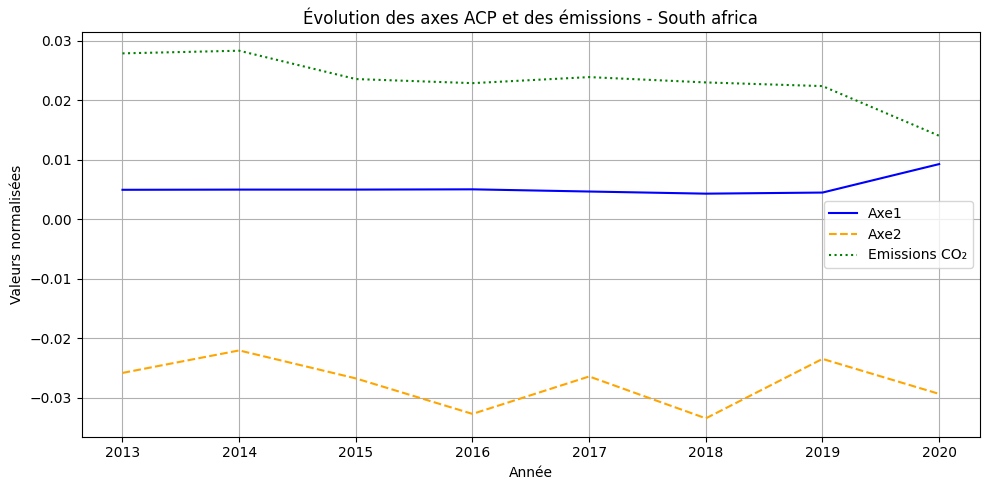

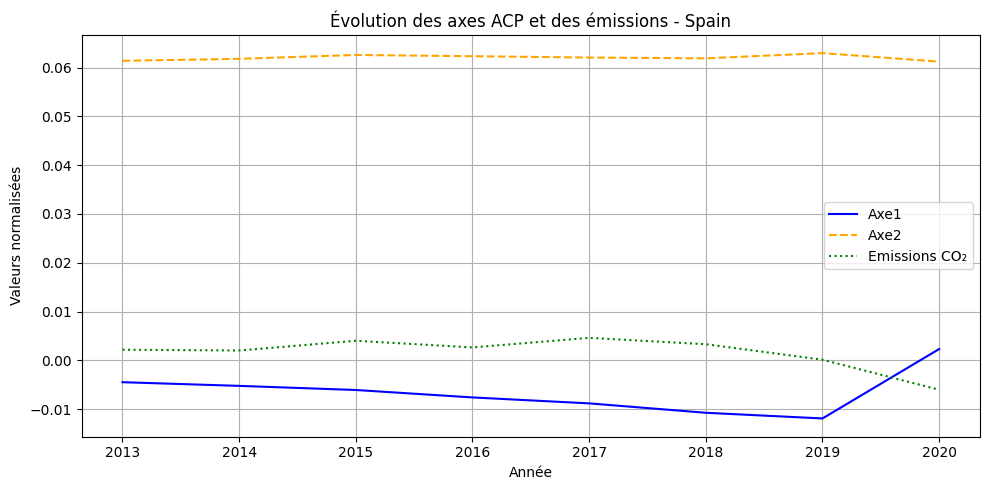

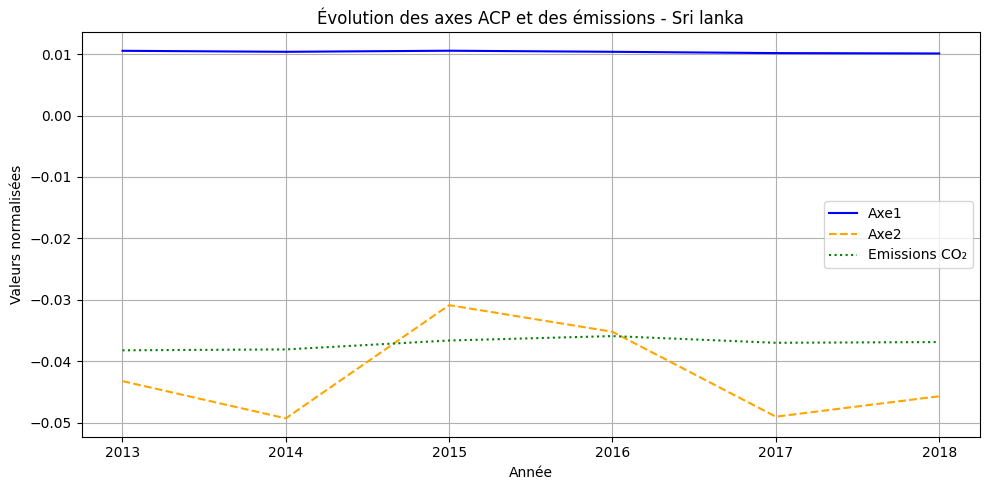

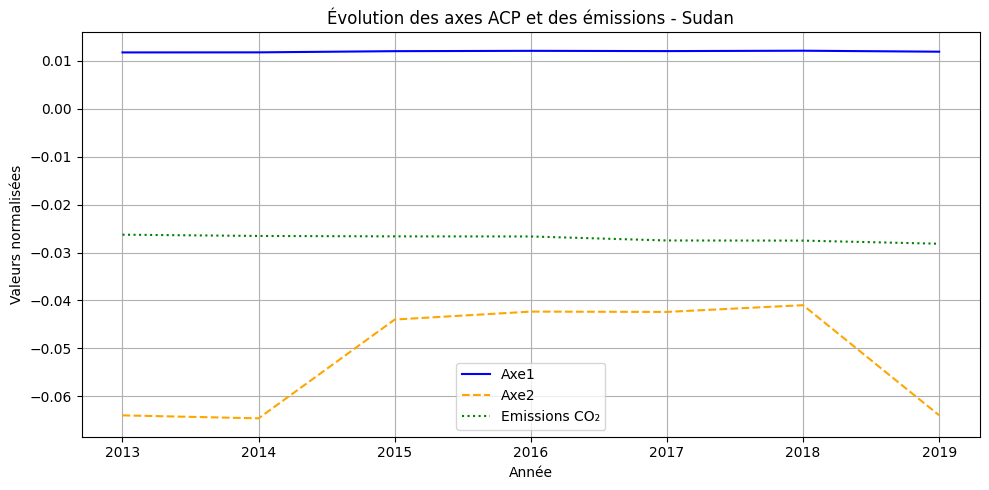

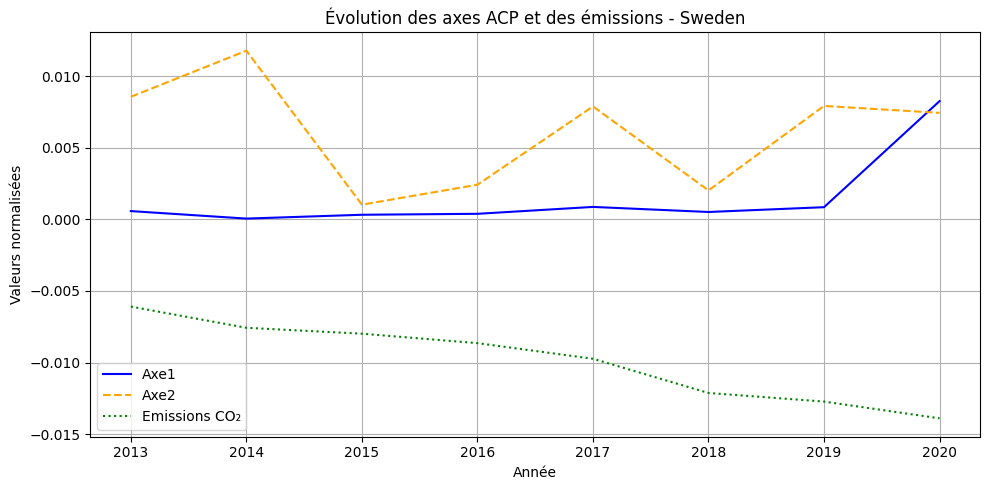

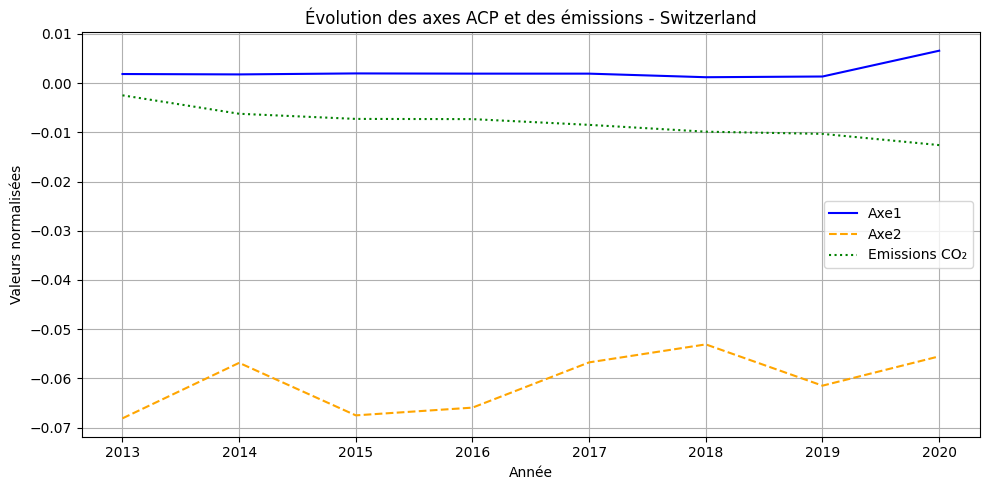

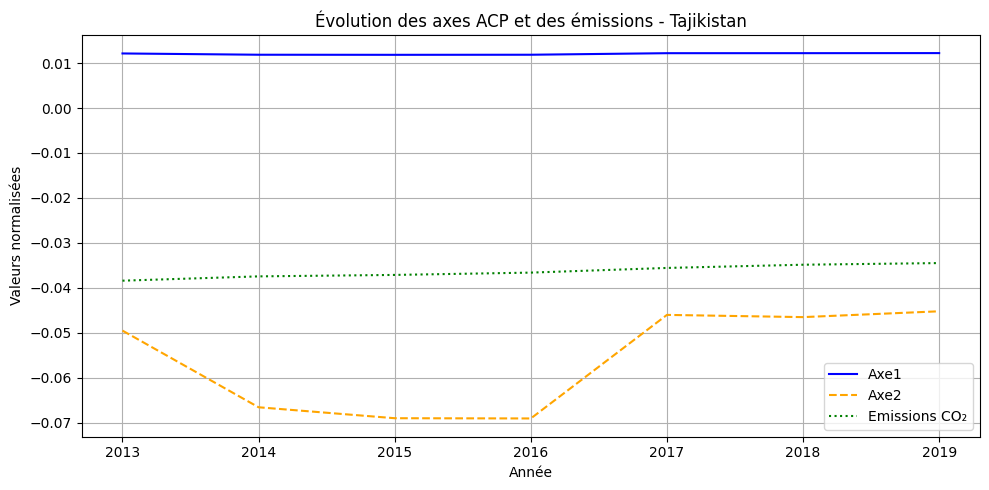

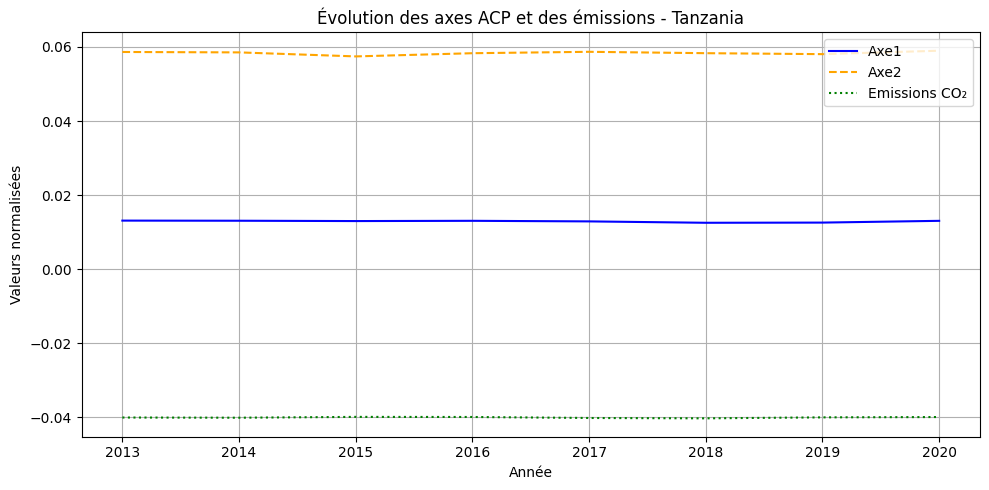

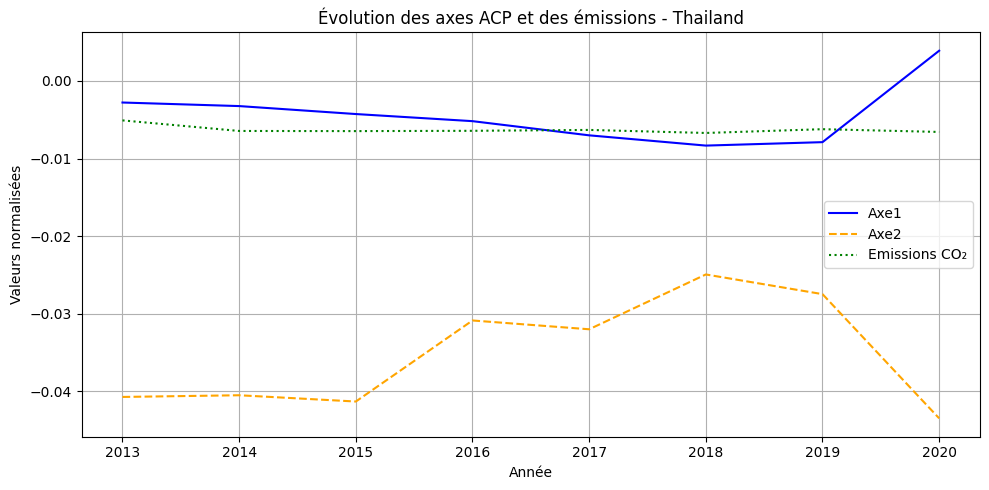

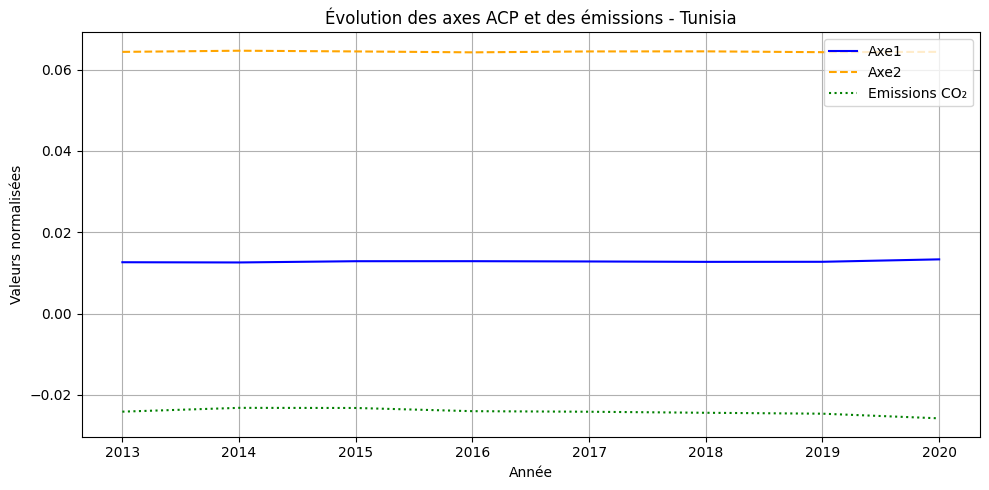

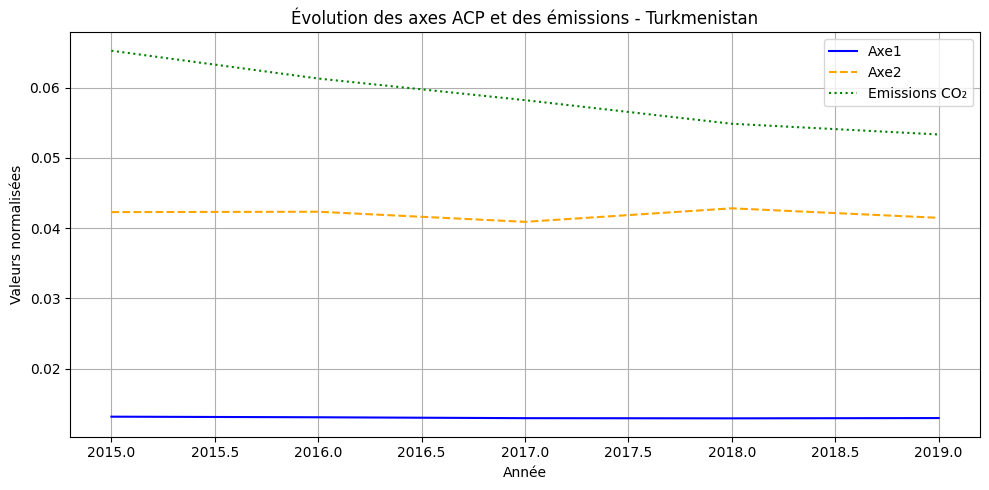

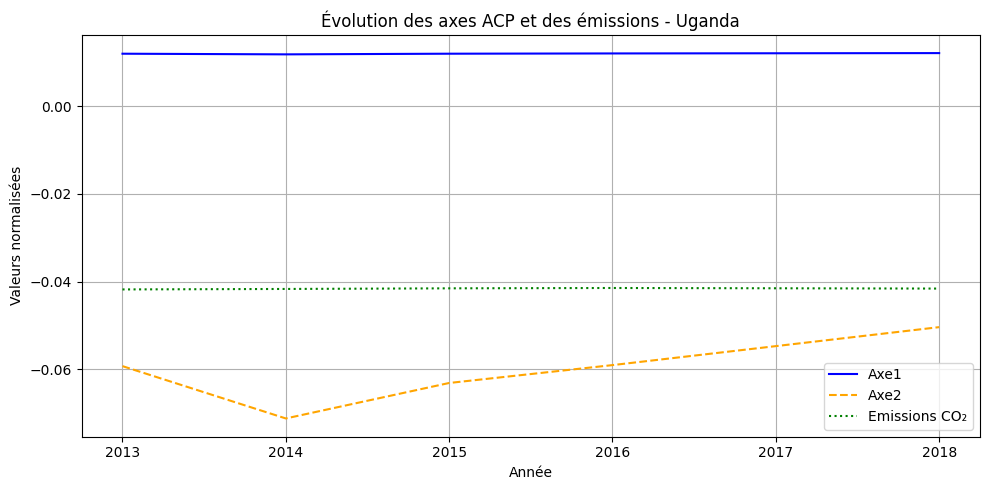

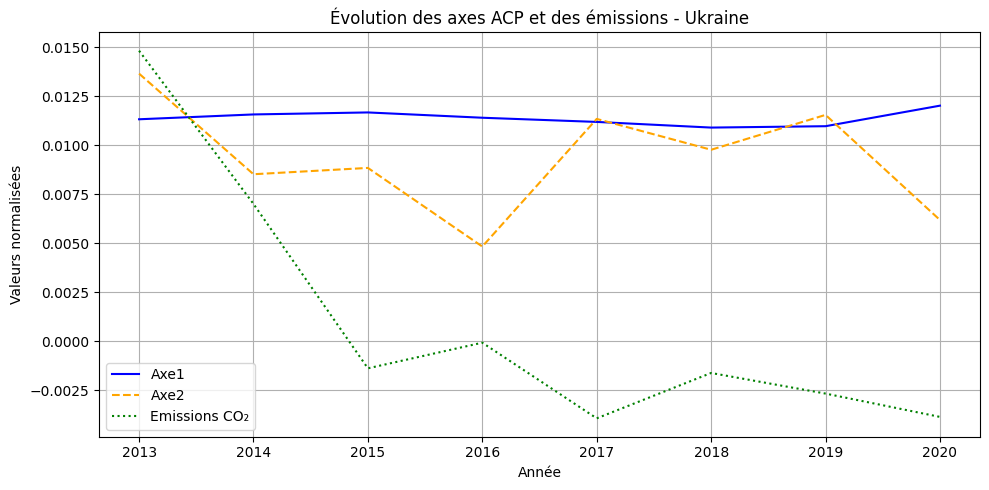

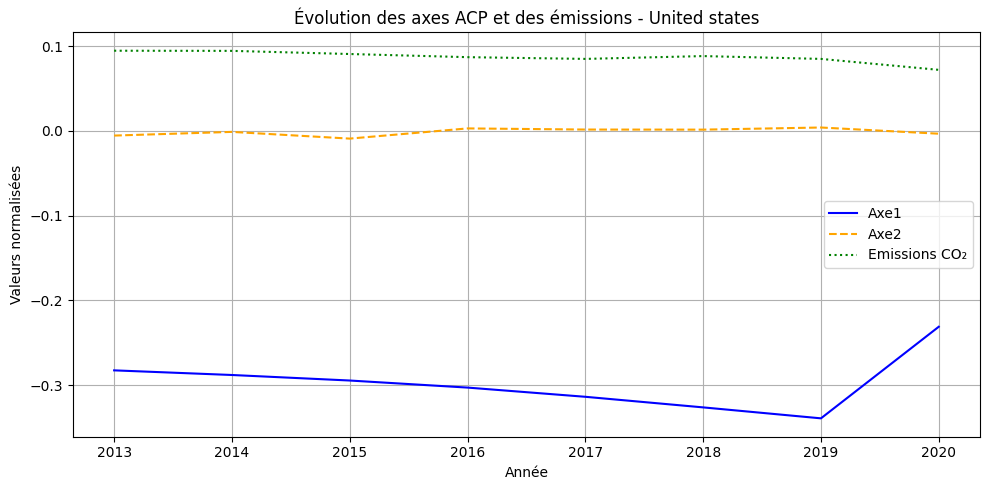

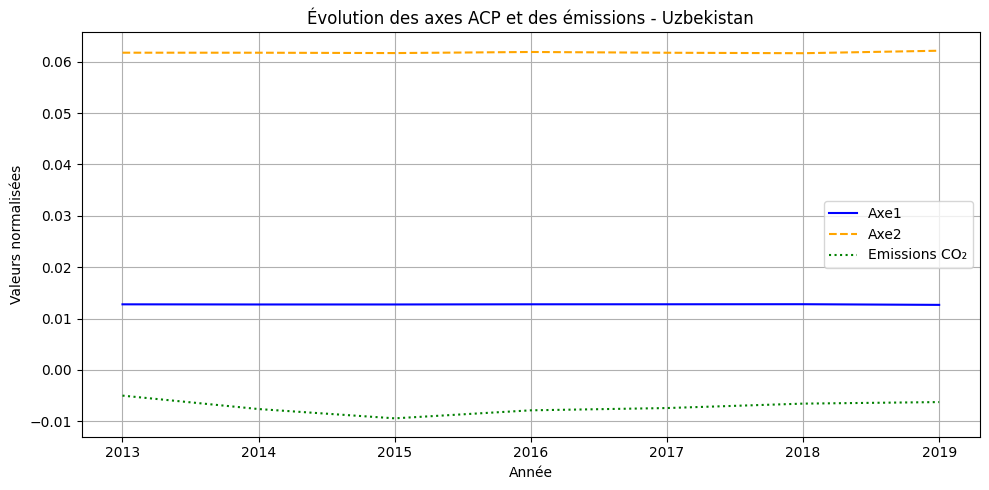

In [235]:
import matplotlib.pyplot as plt
import pandas as pd

# Réinitialiser l'index pour avoir 'Country' et 'Year' en colonnes
df = final_matrice_standardized.reset_index()

# Liste des pays présents
countries = df['Country Name Normalized'].unique()

# Boucle sur chaque pays
for country in countries:
    df_country = df[df['Country Name Normalized'] == country].sort_values('Year')
    
    plt.figure(figsize=(10, 5))
    
    plt.plot(df_country['Year'], df_country['Axe1'], label='Axe1', color='blue')
    plt.plot(df_country['Year'], df_country['Axe2'], label='Axe2', linestyle='--', color='orange')
    plt.plot(df_country['Year'], df_country['Total greenhouse gas emissions'], label='Emissions CO₂', linestyle=':', color='green')
    
    plt.title(f'Évolution des axes ACP et des émissions - {country.capitalize()}')
    plt.xlabel('Année')
    plt.ylabel('Valeurs normalisées')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


                                    Axe1  Total greenhouse gas emissions
Axe1                            1.000000                       -0.309841
Total greenhouse gas emissions -0.309841                        1.000000


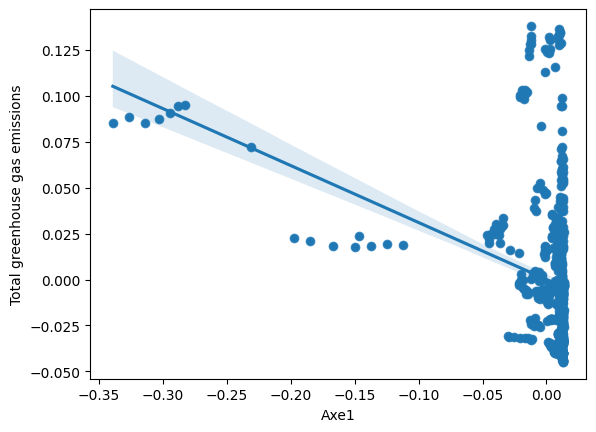

In [236]:
sns.scatterplot(x = final_matrice_standardized_num['Axe1'], y = final_matrice_standardized_num['Total greenhouse gas emissions'])
sns.regplot(x = final_matrice_standardized_num['Axe1'], y = final_matrice_standardized_num['Total greenhouse gas emissions'])
print(final_matrice_standardized_num[['Axe1', 'Total greenhouse gas emissions']].corr())

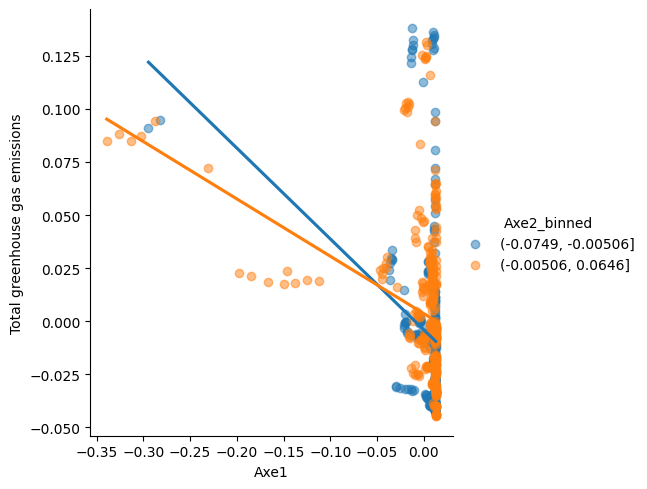

In [180]:
# Discrétiser Axe2
final_matrice_standardized_num['Axe2_binned'] = pd.cut(final_matrice_standardized_num['Axe2'], bins=2)

# Puis utiliser Axe2_binned comme hue
sns.lmplot(
    x='Axe1',
    y='Total greenhouse gas emissions',
    hue='Axe2_binned',
    data=final_matrice_standardized_num,
    scatter_kws={'alpha':0.5},
    ci=None
)

In [181]:
final_matrice_standardized_num['Axe2_binned'] = pd.cut(final_matrice_standardized_num['Axe2'], bins=2)

# 2. Boucler sur chaque bin et calculer la corrélation
for bin_value in final_matrice_standardized_num['Axe2_binned'].unique():
    subset = final_matrice_standardized_num[final_matrice_standardized_num['Axe2_binned'] == bin_value]
    
    if len(subset) > 2:  # vérifier qu'on a assez de points
        r, p_value = pearsonr(subset['Axe1'], subset['Total greenhouse gas emissions'])
        print(f"Groupe {bin_value}: r = {r:.3f}, p-value = {p_value:.3g}")
    else:
        print(f"Groupe {bin_value}: Pas assez de données pour calculer la corrélation")


Groupe (-0.00506, 0.0646]: r = -0.349, p-value = 2.03e-11
Groupe (-0.0749, -0.00506]: r = -0.271, p-value = 6.13e-06


In [238]:
import statsmodels.api as sm

# 1. Définir les variables explicatives (Axe1, Axe2) = proxy pour le trafic aérien
X = final_matrice_standardized_num[['Axe1', 'Axe2']]
X = sm.add_constant(X)  # Ajoute l'intercept

# 2. Définir la variable cible (émissions de GES)
y = final_matrice_standardized_num['Total greenhouse gas emissions']

# 3. Régression linéaire
model = sm.OLS(y, X).fit()

# 4. Résumé du modèle
print(model.summary())


                                  OLS Regression Results                                  
Dep. Variable:     Total greenhouse gas emissions   R-squared:                       0.117
Model:                                        OLS   Adj. R-squared:                  0.114
Method:                             Least Squares   F-statistic:                     40.70
Date:                            Fri, 02 May 2025   Prob (F-statistic):           2.52e-17
Time:                                    20:18:38   Log-Likelihood:                 1147.3
No. Observations:                             618   AIC:                            -2289.
Df Residuals:                                 615   BIC:                            -2275.
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

## Principales conclusions

- Les émissions de CO₂ de l'aviation sont fortement influencées par le volume du trafic passager.
- Les émissions par passager varient considérablement selon les pays, ce qui suggère des différences d'efficacité.
- Un petit nombre de pays représente une grande part des émissions mondiales de l'aviation.
- Les schémas de croissance diffèrent entre les marchés de l'aviation matures et émergents.